# Overview
- In this notebook, we will work with datasets from Acea Group. The goal of this project is to predict water levels and other water characteristics for each unique waterbody. Four models are built to make forecasts for each body.
- There are 9 datasets provided, each represents a unique waterbody or its subgroup. 
- For Aquifers, we want to predict the depth to groundwater. For Water Springs and Lakes, we want to predict the flow rate. For Lakes and Rivers, we want to predict hydrometry at lake and river level, respectively.
- More information: https://www.kaggle.com/c/acea-water-prediction/overview/description
- In this notebook, data cleaning and visualziation were performed for each of the dataset. For time series modeling, they were performed on Aquifer Auser's LT2 column. This pipeline can be generalized and applied to other datasets as well.

<img src="feature_table.png" width="600">

## Part 1: Data Exploration and Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date 

helper function according to this wonderful notebook:https://www.kaggle.com/iamleonie/eda-quenching-the-thirst-for-insights

In [2]:
def create_time_features(df):
    df['year'] = df.Date.apply(lambda x: x.split('/')[2] if x==x else x)
    df['month'] = df.Date.apply(lambda x: x.split('/')[1]if x==x else x)
    df['day_in_year'] = df.Date.apply(lambda x: datetime(int(x.split('/')[2]), int(x.split('/')[1]), int(x.split('/')[0]), 0, 0).timetuple().tm_yday if x==x else x)
    df['week_in_year'] = df.day_in_year.apply(lambda x: int(x/7) if x==x else x)
    return df

In [3]:
#read in datasets.
aqui_auser = pd.read_csv("Aquifer_Auser.csv")
aqui_doganella = pd.read_csv("Aquifer_Doganella.csv")
aqui_luco = pd.read_csv("Aquifer_Luco.csv")
aqui_petrignano = pd.read_csv("Aquifer_Petrignano.csv")
lake_bilancino = pd.read_csv("Lake_Bilancino.csv")
river_arno = pd.read_csv("River_Arno.csv")
ws_amiata = pd.read_csv("Water_Spring_Amiata.csv")
ws_lupa = pd.read_csv("Water_Spring_Lupa.csv")
ws_mc = pd.read_csv("Water_Spring_Madonna_di_Canneto.csv")
lst = [aqui_auser,aqui_doganella,aqui_luco,aqui_petrignano,lake_bilancino,river_arno,ws_amiata,ws_lupa,ws_mc]

In [4]:
lst = [aqui_auser,aqui_doganella,aqui_luco,aqui_petrignano,lake_bilancino,river_arno,ws_amiata,ws_lupa,ws_mc]

In [5]:
#create other time features and convert all date columns to date time formats
for df in lst:
    create_time_features(df)
for df in lst:
    df["Date"] = pd.to_datetime(df.Date, format = '%d/%m/%Y')

In [6]:
def plot_null(df):
    df_null = df.isnull().mean().to_frame().sort_values(0)
    df_null = df_null[df_null[0]>0]
    plt.figure(figsize=(10,6))
    sns.barplot(data = df_null.transpose(),orient="h")

def plot_corr(df):
    plt.figure(figsize = (10,8))
    ax = sns.heatmap(
        data=round(df.corr(),1), 
        square=True,
        annot = True
    )

### Aquifer Auser

In [7]:
#records of depths start on 1/1/2009
auser = aqui_auser[aqui_auser["Date"] >= "2009-01-01"]
auser.tail()

Date  Rainfall_Gallicano  Rainfall_Pontetetto  \
8149 2020-06-26                 0.0                  0.0   
8150 2020-06-27                 0.0                  0.0   
8151 2020-06-28                 0.0                  0.0   
8152 2020-06-29                 0.0                  0.0   
8153 2020-06-30                 0.0                  0.0   

      Rainfall_Monte_Serra  Rainfall_Orentano  Rainfall_Borgo_a_Mozzano  \
8149                   0.0                0.0                       0.0   
8150                   0.0                0.0                       0.0   
8151                   0.0                0.0                       0.0   
8152                   0.0                0.0                       0.0   
8153                   0.0                0.0                       0.0   

      Rainfall_Piaggione  Rainfall_Calavorno  Rainfall_Croce_Arcana  \
8149                 0.0                 0.0                    0.0   
8150                 0.0                 0.0                    0.0   
8151                 0.0                 0.0                    0.0   
8152                 0.0                 0.0                    0.0   
8153                 0.0                 0.0                    0.0   

      Rainfall_Tereglio_Coreglia_Antelminelli  ...  Volume_CC1   Volume_CC2  \
8149                                      0.0  ...   -7847.900 -9183.433333   
8150                                      0.0  ...   -7847.900 -9183.433333   
8151                                      0.0  ...   -7455.505 -8724.261667   
8152                                      0.0  ...   -7847.900 -9183.433333   
8153                                      0.0  ...   -7847.900 -9183.433333   

      Volume_CSA  Volume_CSAL  Hydrometry_Monte_S_Quirico  \
8149    -6115.40      -3158.0                        0.20   
8150    -6115.40      -3158.0                        0.21   
8151    -5809.63      -3000.1                        0.23   
8152    -6115.40      -3158.0                        0.23   
8153    -6115.40      -3158.0                        0.21   

      Hydrometry_Piaggione  year  month  day_in_year  week_in_year  
8149                 -1.03  2020     06          178            25  
8150                 -1.03  2020     06          179            25  
8151                 -1.03  2020     06          180            25  
8152                 -1.02  2020     06          181            25  
8153                 -1.05  2020     06          182            26  

[5 rows x 31 columns]

In [8]:
#drop useless columns
#drop hydrometry_piaggione due to high percentage of missing values
auser_df = auser.drop(["Depth_to_Groundwater_PAG","Depth_to_Groundwater_DIEC","Hydrometry_Piaggione"],axis=1)

<AxesSubplot:>

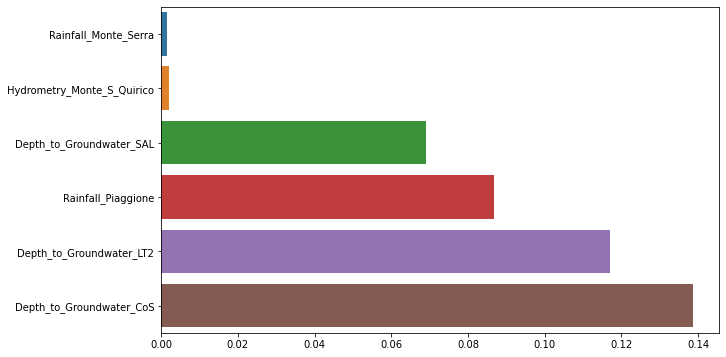

In [9]:
auser_null = auser_df.isnull().mean().to_frame().sort_values(0)
auser_null = auser_null[auser_null[0]>0]
plt.figure(figsize=(10,6))
sns.barplot(data = auser_null.transpose(),orient="h")

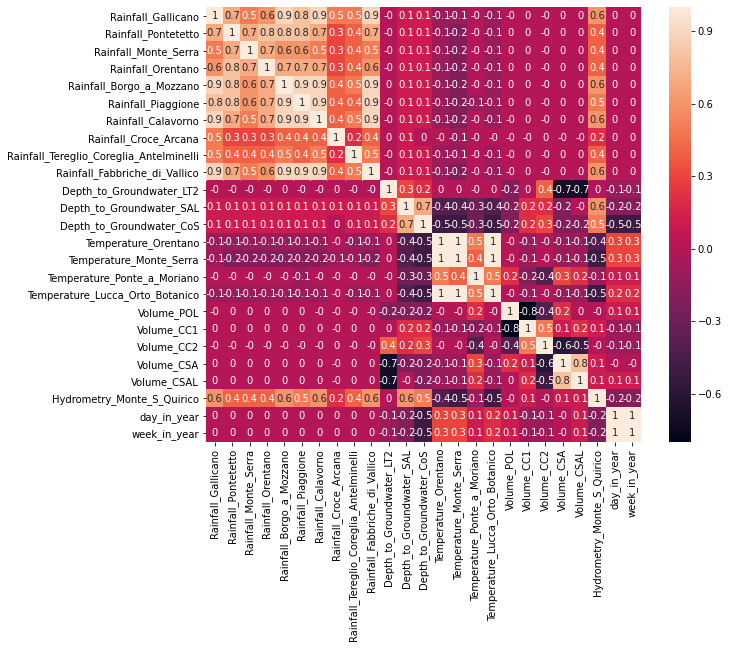

In [10]:
plot_corr(auser_df)

### Aquifer Doganella

In [11]:
#filter dates 
doganella = aqui_doganella[aqui_doganella["Date"] >= "2012-06-01"]
doganella.head()
doganella_df = doganella.copy(deep=True)

<AxesSubplot:>

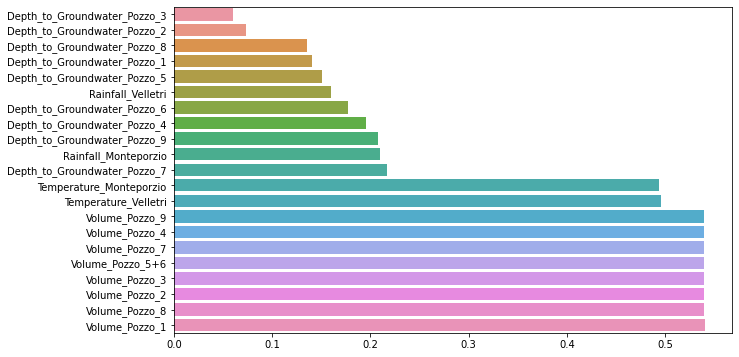

In [12]:
doganella_null = doganella_df.isnull().mean().to_frame().sort_values(0)
doganella_null= doganella_null[doganella_null[0]>0]
plt.figure(figsize=(10,6))
sns.barplot(data = doganella_null.transpose(),orient="h")

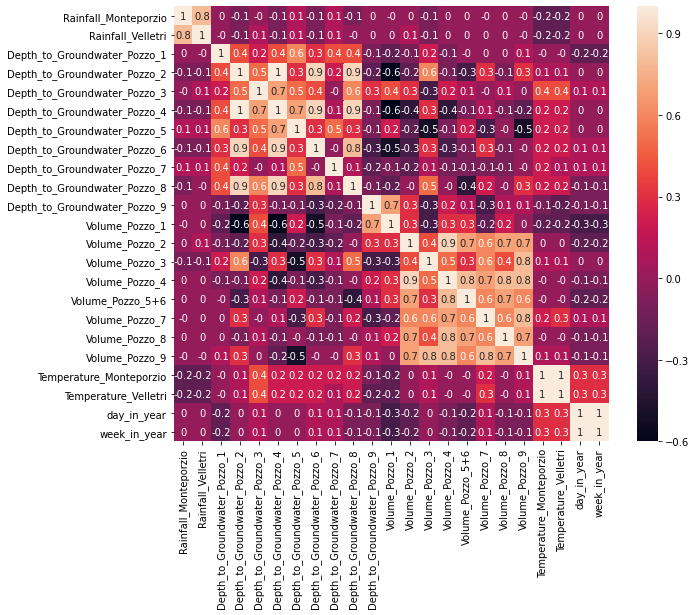

In [13]:
plot_corr(doganella_df)

### Aquifer Luco

In [14]:
#filter dates 
luco = aqui_luco[aqui_luco["Date"] >= "2008-02-21"]
luco.head()

Date  Rainfall_Simignano  Rainfall_Siena_Poggio_al_Vento  \
2973 2008-02-21                 0.0                             NaN   
2974 2008-02-22                 0.0                             NaN   
2975 2008-02-23                 0.2                             NaN   
2976 2008-02-24                 0.2                             NaN   
2977 2008-02-25                 0.0                             NaN   

      Rainfall_Mensano  Rainfall_Montalcinello  Rainfall_Monticiano_la_Pineta  \
2973               NaN                     0.0                            NaN   
2974               NaN                     0.2                            NaN   
2975               NaN                     0.0                            NaN   
2976               NaN                     0.4                            NaN   
2977               NaN                     0.2                            NaN   

      Rainfall_Sovicille  Rainfall_Ponte_Orgia  Rainfall_Scorgiano  \
2973                 0.0                   NaN                 NaN   
2974                 0.0                   NaN                 NaN   
2975                 0.0                   NaN                 NaN   
2976                 0.0                   NaN                 NaN   
2977                 0.0                   NaN                 NaN   

      Rainfall_Pentolina  ...  Temperature_Mensano  Temperature_Pentolina  \
2973                 NaN  ...                  0.0                   8.70   
2974                 NaN  ...                  0.0                   9.35   
2975                 NaN  ...                  0.0                   8.60   
2976                 NaN  ...                  0.0                   9.85   
2977                 NaN  ...                  0.0                   9.55   

      Temperature_Monteroni_Arbia_Biena  Volume_Pozzo_1  Volume_Pozzo_3  \
2973                               7.90             NaN             NaN   
2974                               7.00             NaN             NaN   
2975                               6.80             NaN             NaN   
2976                               9.40             NaN             NaN   
2977                               7.15             NaN             NaN   

      Volume_Pozzo_4  year  month  day_in_year  week_in_year  
2973             NaN  2008     02           52             7  
2974             NaN  2008     02           53             7  
2975             NaN  2008     02           54             7  
2976             NaN  2008     02           55             7  
2977             NaN  2008     02           56             8  

[5 rows x 26 columns]

In [15]:
#drop columns 
luco_df = luco.drop(["Depth_to_Groundwater_Pozzo_1","Depth_to_Groundwater_Pozzo_3","Depth_to_Groundwater_Pozzo_4"],axis=1)

<AxesSubplot:>

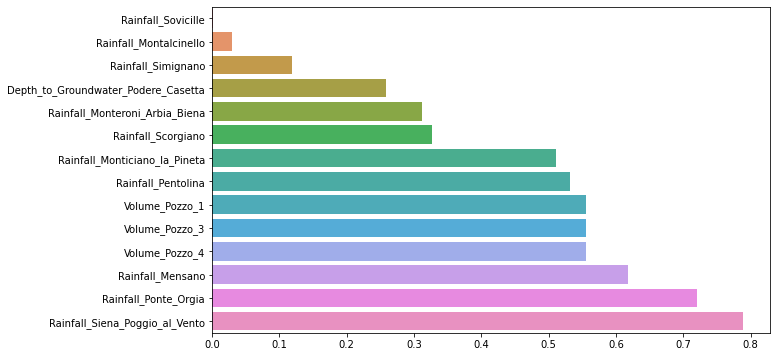

In [16]:
luco_null = luco_df.isnull().mean().to_frame().sort_values(0)
luco_null= luco_null[luco_null[0]>0]
plt.figure(figsize=(10,6))
sns.barplot(data = luco_null.transpose(),orient="h")

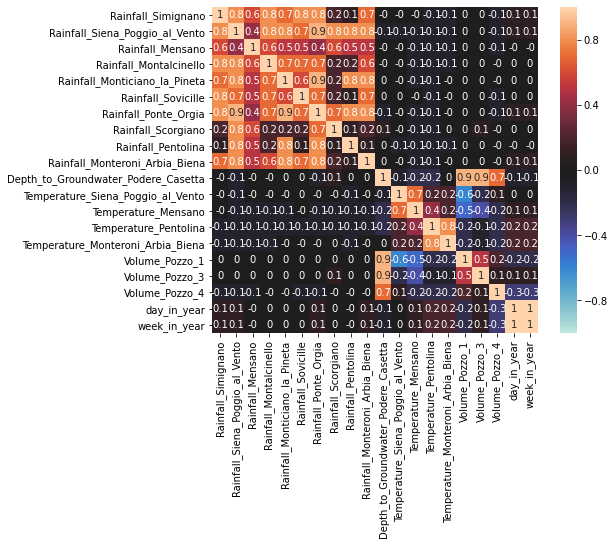

In [17]:
plt.figure(figsize = (8,6))
ax = sns.heatmap(
    round(luco_df.corr(),1), 
    vmin=-1, vmax=1, center=0,
    square=True,
    annot=True
)

### Aquifer Petrignano

In [18]:
#all contains depth info


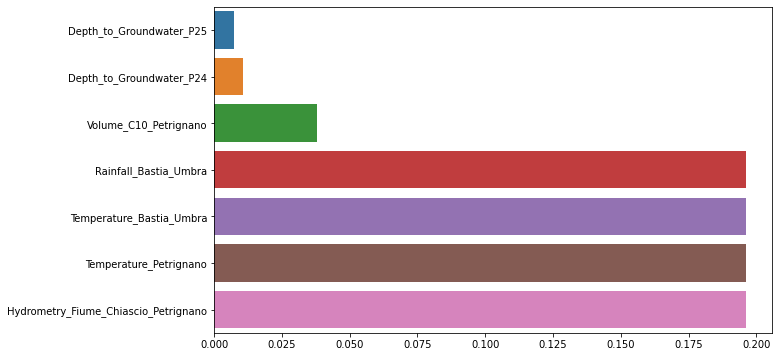

In [19]:
# petri_null = aqui_petrignano.isnull().mean().to_frame().sort_values(0)
# petri_null= petri_null[petri_null[0]>0]
# plt.figure(figsize=(10,6))
# sns.barplot(data = petri_null.transpose(),orient="h")
plot_null(aqui_petrignano)

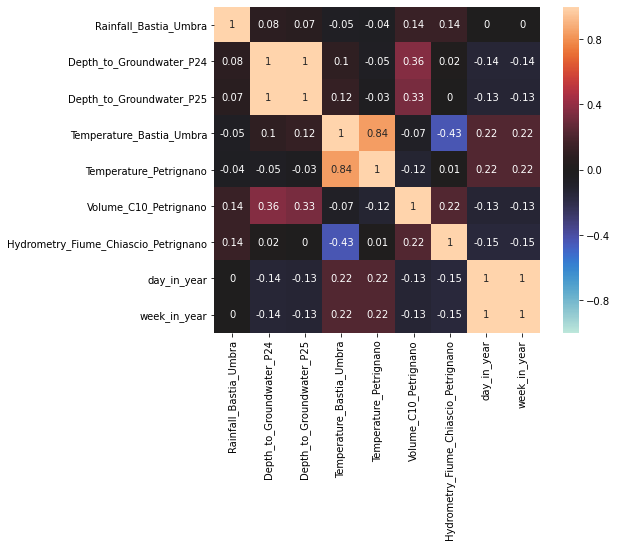

In [20]:
plt.figure(figsize = (8,6))
ax = sns.heatmap(
    round(aqui_petrignano.corr(),2), 
    vmin=-1, vmax=1, center=0,
    square=True,
    annot=True
)

### Lake Bilancino

In [21]:
bilancino = lake_bilancino[lake_bilancino["Date"]>="2004-01-01"]

In [22]:
#absolute value of flow rate
bilancino.loc[:,"Flow_Rate"] = bilancino["Flow_Rate"].apply(lambda x:abs(x))
bilancino.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Date  Rainfall_S_Piero  Rainfall_Mangona  Rainfall_S_Agata  \
577 2004-01-01               0.0               0.0               0.4   
578 2004-01-02               0.0               0.0               0.0   
579 2004-01-03               0.0               0.0               0.0   
580 2004-01-04               0.0               0.0               0.0   
581 2004-01-05               0.2               0.0               0.0   

     Rainfall_Cavallina  Rainfall_Le_Croci  Temperature_Le_Croci  Lake_Level  \
577                 0.0                0.0                   NaN      251.14   
578                 0.0                0.0                  6.50      251.21   
579                 0.0                0.0                  4.45      251.28   
580                 0.0                0.0                  2.00      251.35   
581                 0.0                0.0                  0.90      251.37   

     Flow_Rate  year month  day_in_year  week_in_year  
577        0.5  2004    01            1             0  
578        0.5  2004    01            2             0  
579        0.5  2004    01            3             0  
580        0.5  2004    01            4             0  
581        0.5  2004    01            5             0

<AxesSubplot:>

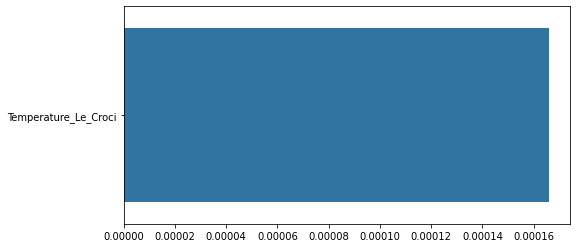

In [23]:
bilan_null = bilancino.isnull().mean().to_frame().sort_values(0)
bilan_null= bilan_null[bilan_null[0]>0]
plt.figure(figsize=(8,4))
sns.barplot(data = bilan_null.transpose(),orient="h")

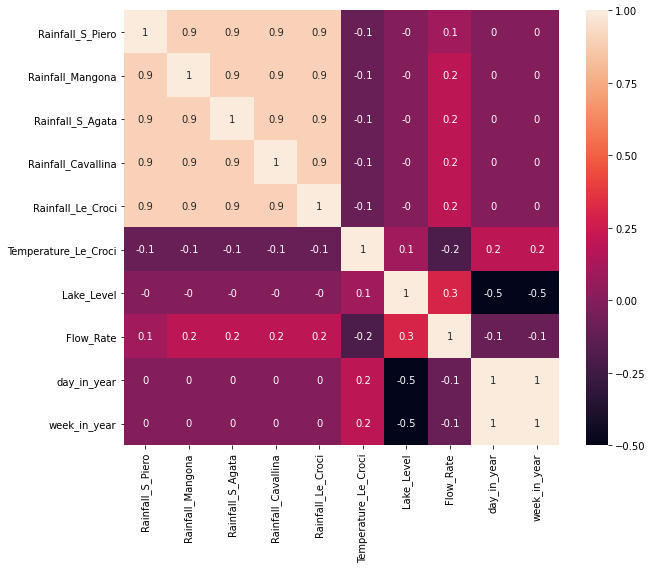

In [24]:
plot_corr(bilancino)

### River Arno

In [25]:
arno= river_arno[river_arno["Date"]>="2004-01-01"]
arno.head()

Date  Rainfall_Le_Croci  Rainfall_Cavallina  Rainfall_S_Agata  \
2191 2004-01-01                0.0                 0.0               0.4   
2192 2004-01-02                0.0                 0.0               0.0   
2193 2004-01-03                0.0                 0.0               0.0   
2194 2004-01-04                0.0                 0.0               0.0   
2195 2004-01-05                0.0                 0.0               0.0   

      Rainfall_Mangona  Rainfall_S_Piero  Rainfall_Vernio  Rainfall_Stia  \
2191               0.0               0.0              0.0            0.0   
2192               0.0               0.0              0.0            0.0   
2193               0.0               0.0              0.0            0.2   
2194               0.0               0.0              0.0            0.0   
2195               0.0               0.2              0.0            0.0   

      Rainfall_Consuma  Rainfall_Incisa  ...  Rainfall_S_Savino  \
2191               0.0              0.0  ...                0.0   
2192               0.0              0.0  ...                0.2   
2193               0.0              0.0  ...                0.0   
2194               0.0              0.0  ...                0.0   
2195               0.0              0.0  ...                0.0   

      Rainfall_Laterina  Rainfall_Bibbiena  Rainfall_Camaldoli  \
2191                0.0                0.0                 0.0   
2192                0.0                0.0                 0.0   
2193                0.0                0.2                 0.0   
2194                0.0                0.0                 0.0   
2195                0.0                0.0                 0.0   

      Temperature_Firenze  Hydrometry_Nave_di_Rosano  year month day_in_year  \
2191                 8.65                       1.84  2004    01           1   
2192                 7.10                       1.93  2004    01           2   
2193                 5.50                       1.61  2004    01           3   
2194                 3.55                       1.35  2004    01           4   
2195                 2.70                       1.44  2004    01           5   

      week_in_year  
2191             0  
2192             0  
2193             0  
2194             0  
2195             0  

[5 rows x 21 columns]

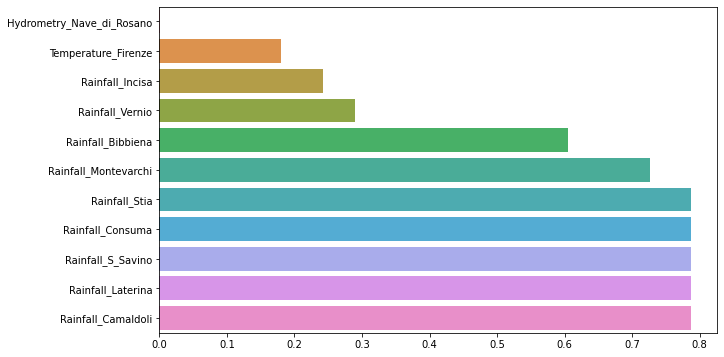

In [26]:
plot_null(arno)

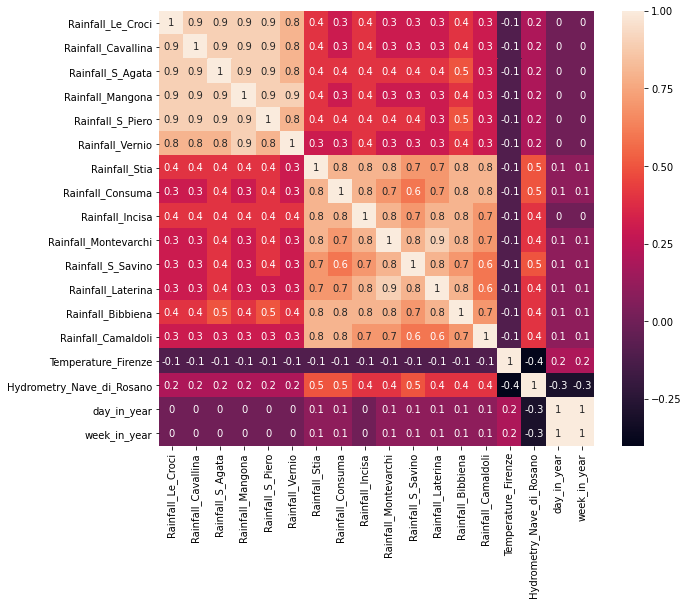

In [27]:
plot_corr(arno)

### Water Spring Amiata

In [28]:
import re
ws_amiata_df = ws_amiata[ws_amiata["Date"] >= "2015-01-01"]
#absolute value of flow rate
amiata_flrt = [x for x in ws_amiata_df.columns if re.search("Flow",x)]
ws_amiata_df.loc[:,amiata_flrt] = ws_amiata_df.loc[:,amiata_flrt].apply(lambda x:abs(x))
ws_amiata_df.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


Date  Rainfall_Castel_del_Piano  Rainfall_Abbadia_S_Salvatore  \
5479 2015-01-01                        0.0                           0.0   
5480 2015-01-02                        0.0                           0.0   
5481 2015-01-03                        0.0                           0.0   
5482 2015-01-04                        0.0                           0.0   
5483 2015-01-05                        0.0                           0.0   

      Rainfall_S_Fiora  Rainfall_Laghetto_Verde  Rainfall_Vetta_Amiata  \
5479               NaN                      0.0                    0.0   
5480               NaN                      0.0                    0.0   
5481               NaN                      0.0                    0.0   
5482               NaN                      0.0                    0.0   
5483               NaN                      0.0                    0.0   

      Depth_to_Groundwater_S_Fiora_8  Depth_to_Groundwater_S_Fiora_11bis  \
5479                          -36.57                              -50.65   
5480                          -36.58                              -50.65   
5481                          -36.58                              -50.64   
5482                          -36.58                              -50.64   
5483                          -36.58                              -50.52   

      Depth_to_Groundwater_David_Lazzaretti  Temperature_Abbadia_S_Salvatore  \
5479                                -292.95                            -2.30   
5480                                -292.93                             6.15   
5481                                -292.97                             6.30   
5482                                -293.03                             7.90   
5483                                -293.00                             4.05   

      Temperature_S_Fiora  Temperature_Laghetto_Verde  Flow_Rate_Bugnano  \
5479                -2.40                       -2.25                0.0   
5480                 3.60                        5.40                0.0   
5481                 5.25                        4.55                0.0   
5482                 5.45                        7.25                0.0   
5483                 3.30                        2.90                0.0   

      Flow_Rate_Arbure  Flow_Rate_Ermicciolo  Flow_Rate_Galleria_Alta  year  \
5479               0.0              5.906212                23.510146  2015   
5480               0.0              5.906212                23.510146  2015   
5481               0.0              5.906212                23.510146  2015   
5482               0.0              5.610902                22.334638  2015   
5483               0.0              5.906212                23.510146  2015   

     month  day_in_year  week_in_year  
5479    01            1             0  
5480    01            2             0  
5481    01            3             0  
5482    01            4             0  
5483    01            5             0

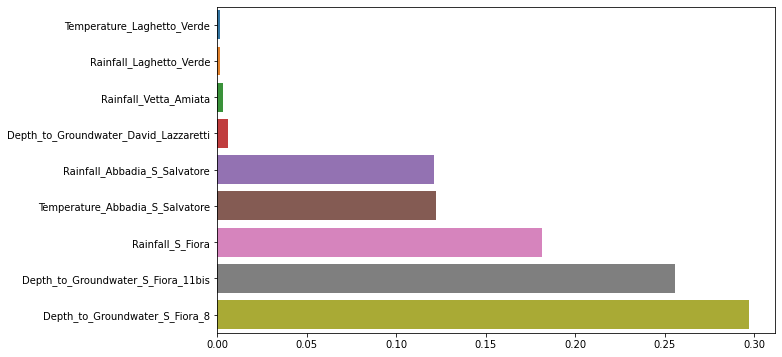

In [29]:
plot_null(ws_amiata_df)

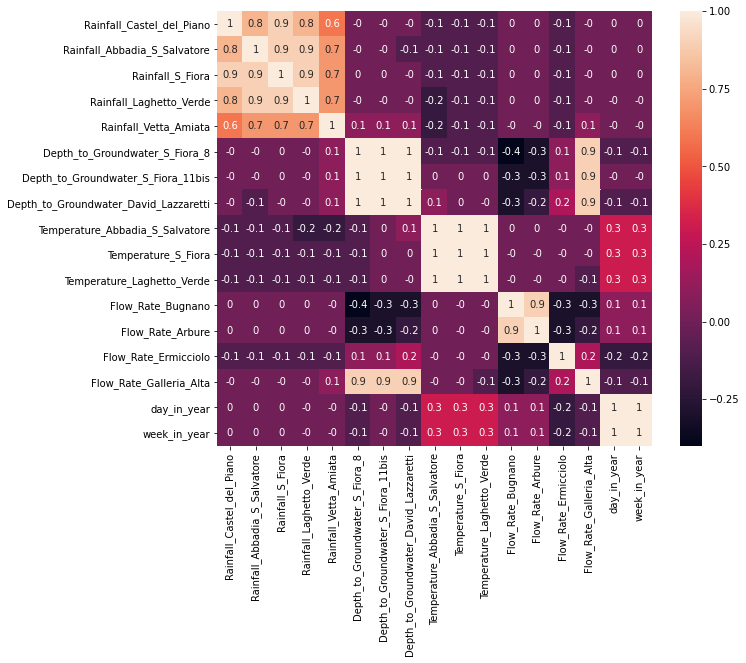

In [30]:
plot_corr(ws_amiata_df)

### Water Spring Lupa

In [31]:
ws_lupa_df = ws_lupa[ws_lupa["Date"] >="2009-02-19"]
ws_lupa_df.loc[:,"Flow_Rate_Lupa"] = ws_lupa_df["Flow_Rate_Lupa"].apply(lambda x:abs(x))
ws_lupa_df.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Date  Rainfall_Terni  Flow_Rate_Lupa  year month  day_in_year  \
49 2009-02-19           2.763          166.02  2009    02           50   
50 2009-02-20           2.763          166.97  2009    02           51   
51 2009-02-21           2.763          167.72  2009    02           52   
52 2009-02-22           2.763          168.65  2009    02           53   
53 2009-02-23           2.763          169.42  2009    02           54   

    week_in_year  
49             7  
50             7  
51             7  
52             7  
53             7

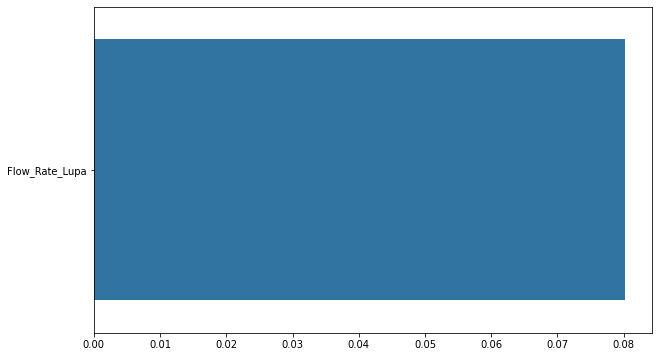

In [32]:
plot_null(ws_lupa_df)

### Water Spring Madonna_di_Canneto

In [33]:
ws_mc_df = ws_mc[ws_mc["Date"]>="2015-03-13"]
ws_mc_df.loc[:,"Flow_Rate_Madonna_di_Canneto"] = ws_mc_df["Flow_Rate_Madonna_di_Canneto"].apply(lambda x:abs(x))
ws_mc_df.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Date  Rainfall_Settefrati  Temperature_Settefrati  \
1167 2015-03-13                  0.0                    5.70   
1168 2015-03-14                  5.8                    7.10   
1169 2015-03-15                  7.4                    4.90   
1170 2015-03-16                  8.6                    7.50   
1171 2015-03-17                  7.6                    7.55   

      Flow_Rate_Madonna_di_Canneto  year month  day_in_year  week_in_year  
1167                    255.956525  2015    03         72.0          10.0  
1168                    289.545561  2015    03         73.0          10.0  
1169                    289.918615  2015    03         74.0          10.0  
1170                    290.082896  2015    03         75.0          10.0  
1171                    290.688777  2015    03         76.0          10.0

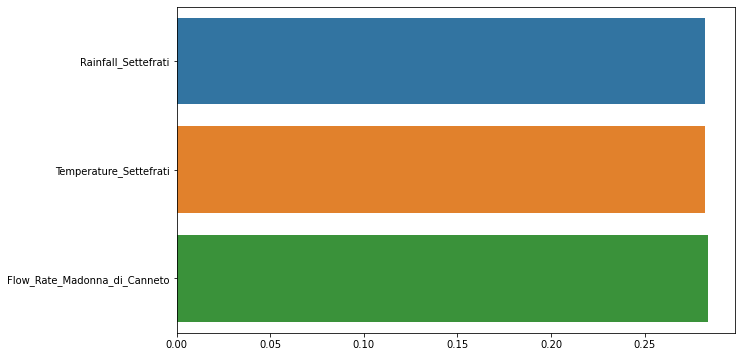

In [34]:
plot_null(ws_mc_df)

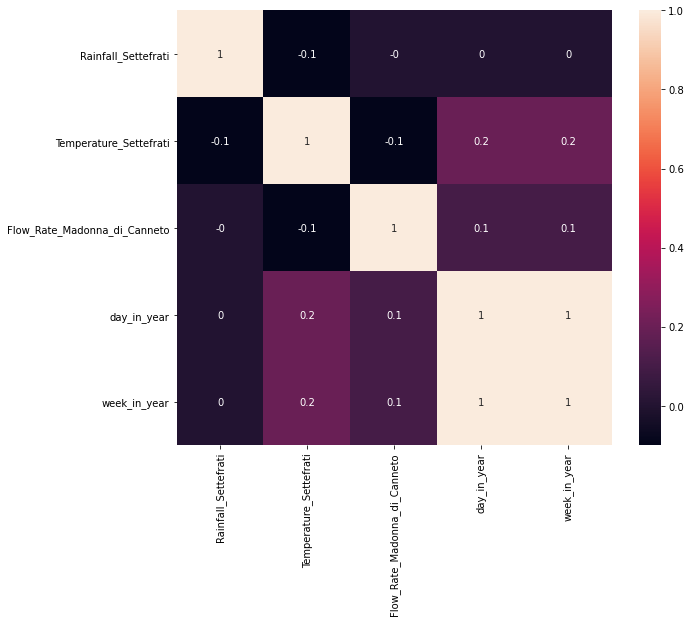

In [35]:
plot_corr(ws_mc_df)

## Part 2: EDA and Modeling For Each Waterbody

#### Define several helper functions

In [36]:
#plot overlaid lineplots for columns within a specific category
def group_plots(df):
    d = {}
    d["temp_cols"] = [x for x in df.columns if re.search("Temperature",x)]
    d["rainfall_cols"] = [x for x in df.columns if re.search("Rainfall",x)]
    d["depth_cols"] = [x for x in df.columns if re.search("Depth",x)]
    d["hydro_cols"] = [x for x in df.columns if re.search("Hydrometry",x)]
    d["flow_cols"] = [x for x in df.columns if re.search("Flow",x)]
    d["vol_cols"] = [x for x in df.columns if re.search("Volume",x)]
    for key in d.keys():
        if d[key]:
            fig, ax = plt.subplots(figsize = (15,5))
            for i in d[key]:
                sns.lineplot(x = df["Date"], y = df[i],label = i)
            plt.legend()
            

In [37]:
#replace abnormal zeros in temperature columns with missing values
#function from https://www.kaggle.com/iamleonie/eda-quenching-the-thirst-for-insights
def replace_zeros_with_nan(df, cols):
    for col in cols:
        temp_col = df[[col]].copy()
        temp_col['key'] = (temp_col[col] != temp_col[col].shift(1)).astype(int).cumsum()
        key_dict = temp_col.groupby(['key']).agg({col : 'mean', 'key':'count'})
        key_dict = key_dict[(key_dict[col]==0) & (key_dict.key >2)]
        for key in key_dict.index:
            temp_col[col] = np.where(temp_col['key'] == key, np.nan, temp_col[col]) 
        df.loc[:,col] = temp_col[col] 
   

In [38]:
#impute missing values of a data frame using median values of the same day of the year in other years
def impute_nan(df,df_by_day,cols):
    for col in cols: 
        s = df[col]
        r=[]
        for i in range(len(s)):
            if np.isnan(s.iloc[i]):
                res = df_by_day.loc[df["day_in_year"].iloc[i]-1,col]
                r.append(res)
            else:
                r.append(s.iloc[i])
        df.loc[:,col] = r



### Aquifer

#### Auser

In [39]:
auser_df.columns

Index(['Date', 'Rainfall_Gallicano', 'Rainfall_Pontetetto',
       'Rainfall_Monte_Serra', 'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano',
       'Rainfall_Piaggione', 'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli',
       'Rainfall_Fabbriche_di_Vallico', 'Depth_to_Groundwater_LT2',
       'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_CoS',
       'Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico',
       'Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL',
       'Hydrometry_Monte_S_Quirico', 'year', 'month', 'day_in_year',
       'week_in_year'],
      dtype='object')

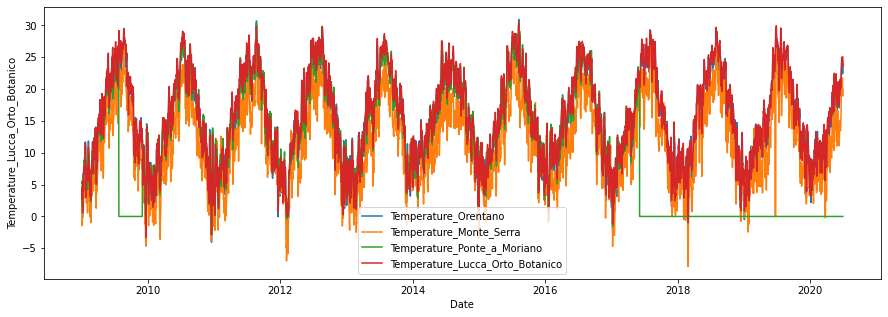

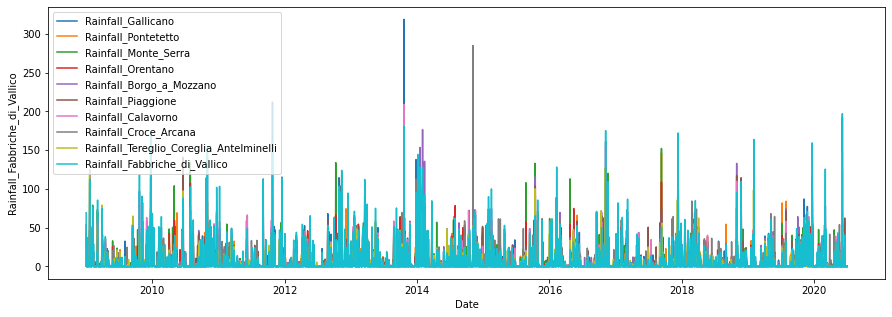

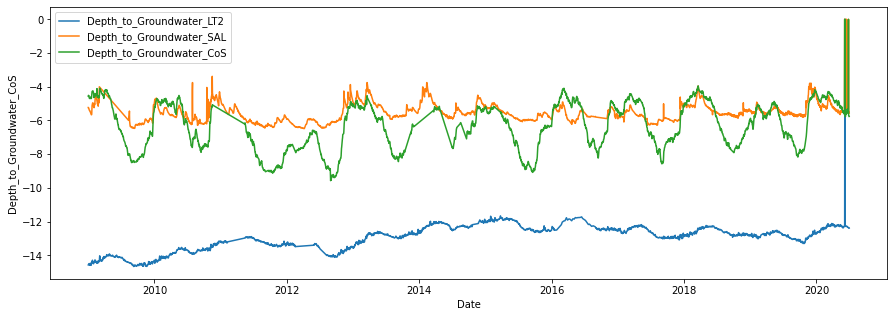

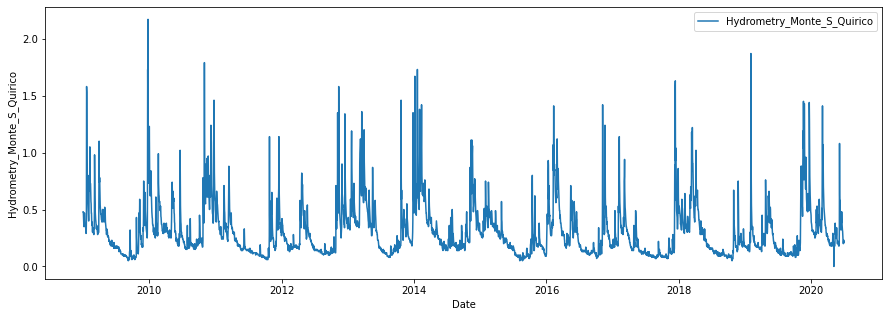

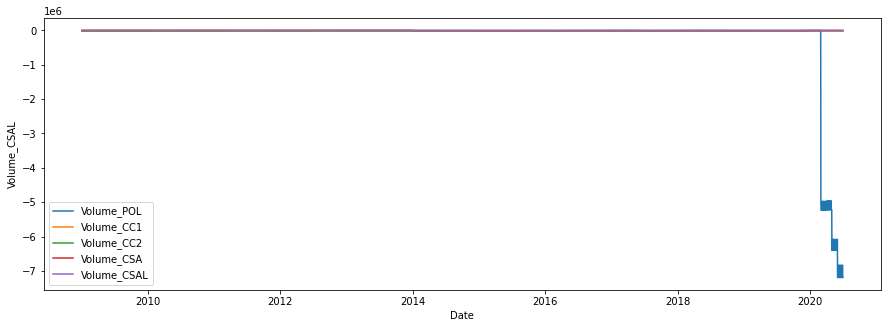

In [40]:
group_plots(auser_df)

In [41]:
#volume columns seems to be inconsistent, drop them for now
auser_vol_cols = [c for c in auser_df.columns if re.search("Volume",c)]
auser_df = auser_df.drop(auser_vol_cols,axis=1)

Based on the plots above, we can see strong seasonality for each of the feature, and features belonging to the same category share common seasonal patterns. Note there are abnormal zero values for temperature in Lucca Orto Botanico. Abnormal zeroes are going to be replaced with NaN. And NaN will be imputed using median values across years or linear interpolation.

In [42]:
auser_depth = [c for c in auser_df.columns if re.search("Depth",c)]
#interpolate all depth columns
for i in auser_depth:
    auser_df.loc[:,i][auser_df[i]==0] = np.nan
auser_df.loc[:,auser_depth] = auser_df.loc[:,auser_depth].interpolate()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [43]:
auser_depth

['Depth_to_Groundwater_LT2',
 'Depth_to_Groundwater_SAL',
 'Depth_to_Groundwater_CoS']

In [44]:
auser_df['Depth_to_Groundwater_LT2'][auser_df['Depth_to_Groundwater_LT2']==0]

Series([], Name: Depth_to_Groundwater_LT2, dtype: float64)

In [45]:
replace_zeros_with_nan(auser_df,["Temperature_Ponte_a_Moriano" ])

In [46]:
auser_by_month_day = auser_df.groupby("day_in_year").median().reset_index()
auser_by_month_day.head()

day_in_year  Rainfall_Gallicano  Rainfall_Pontetetto  Rainfall_Monte_Serra  \
0            1                 0.1                  0.1                   0.0   
1            2                 1.3                  0.5                   0.0   
2            3                 0.2                  0.2                   0.0   
3            4                 0.0                  0.2                   0.3   
4            5                 0.0                  0.0                   0.0   

   Rainfall_Orentano  Rainfall_Borgo_a_Mozzano  Rainfall_Piaggione  \
0                0.0                       0.0                 0.0   
1                0.3                       0.4                 0.8   
2                0.0                       0.3                 1.0   
3                0.2                       0.0                 0.0   
4                0.2                       0.0                 0.0   

   Rainfall_Calavorno  Rainfall_Croce_Arcana  \
0                 0.0                    0.0   
1                 1.4                    0.0   
2                 0.2                    0.3   
3                 0.2                    0.0   
4                 0.0                    0.0   

   Rainfall_Tereglio_Coreglia_Antelminelli  Rainfall_Fabbriche_di_Vallico  \
0                                      0.2                            0.0   
1                                      1.2                            2.3   
2                                      0.0                            3.6   
3                                      0.0                            0.1   
4                                      0.0                            0.1   

   Depth_to_Groundwater_LT2  Depth_to_Groundwater_SAL  \
0                   -12.820                    -5.160   
1                   -12.800                    -5.180   
2                   -12.825                    -5.210   
3                   -12.815                    -5.220   
4                   -12.795                    -5.155   

   Depth_to_Groundwater_CoS  Temperature_Orentano  Temperature_Monte_Serra  \
0                 -5.311818                 4.950                    4.400   
1                 -5.270000                 6.350                    5.800   
2                 -5.303182                 5.575                    4.625   
3                 -5.306364                 4.525                    5.050   
4                 -5.329545                 5.475                    4.975   

   Temperature_Ponte_a_Moriano  Temperature_Lucca_Orto_Botanico  \
0                         5.80                            4.725   
1                         6.80                            7.150   
2                         6.45                            5.350   
3                         5.00                            4.750   
4                         5.95                            5.850   

   Hydrometry_Monte_S_Quirico  week_in_year  
0                       0.365             0  
1                       0.405             0  
2                       0.425             0  
3                       0.390             0  
4                       0.375             0

In [47]:
s = auser_df["Temperature_Ponte_a_Moriano"]
r=[]
for i in range(len(s)):
    if np.isnan(s.iloc[i]):
        res = auser_by_month_day.loc[auser_df["day_in_year"].iloc[i]-1,"Temperature_Ponte_a_Moriano"]
        r.append(res)
    else:
        r.append(s.iloc[i])


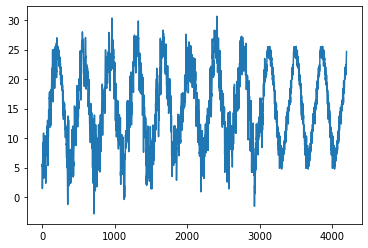

In [48]:
plt.plot(r)

In [49]:
#impute columns with missing values other than depths with median values
impute_nan(auser_df,auser_by_month_day ,auser_df.columns[1:-4])

In [50]:
auser_df.loc[:,'Temperature_Ponte_a_Moriano'] = r

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

In [52]:
from pmdarima import auto_arima

In [53]:
#ADF test from https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")  

#### Modeling Auser

In [54]:
auser_depth
auser_df.index = auser_df["Date"]

In [55]:
auser_train, auser_test = auser_df[:3360],auser_df[3360:]

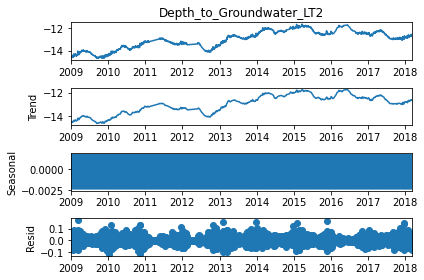

In [56]:
lt2_decomp = seasonal_decompose(auser_train['Depth_to_Groundwater_LT2'])
x = lt2_decomp.plot()

In [57]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller

In [58]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.api import ARIMA
from statsmodels.tools.eval_measures import rmse, aic

In [59]:
adfuller_test(auser_train['Depth_to_Groundwater_LT2'].diff()[1:])

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.4352
 No. Lags Chosen       = 25
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


In [60]:
#model arima based on first difference
lt2_d1 = auser_train['Depth_to_Groundwater_LT2'].diff()[1:]

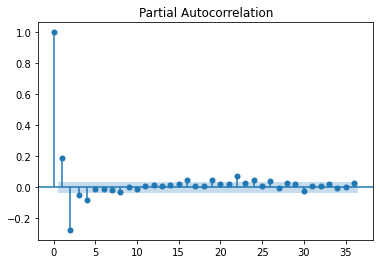

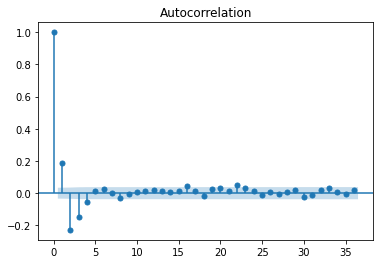

In [61]:
a = plot_pacf(lt2_d1)
b = plot_acf(lt2_d1)

Both ACF and PACF of Depth at LT2 goes to zero after a few spikes, therefore, an arima model can be performed according to the patterns in these plots. For automatic selection, I used the auto_arima function provided to choose the best arima parameters.

In [62]:
auto_arima(auser_train['Depth_to_Groundwater_LT2'])

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

#### ARIMA for each individual depth column

In [63]:
arima_models = []
for d in auser_depth:
    arima_models.append(auto_arima(auser_train[d]))

In [64]:
auto_arima(auser_train[d],D=1)

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [65]:
forecast = []
for mod in arima_models:
    preds = mod.predict(n_periods = auser_test.shape[0])
    forecast.append(preds)

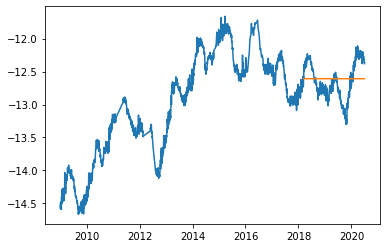

In [66]:
plt.plot(auser_df["Date"],auser_df['Depth_to_Groundwater_LT2'])
plt.plot(auser_test["Date"],forecast[0])

The chosen ARIMA(1,1,2) model seems not captureing the seasonality of the depth

#### Prophet for each individual depth column

In [67]:
auser_ts_train = auser_train[["Date",auser_depth[0]]]
auser_ts_train  = auser_ts_train.rename(columns={"Date":"ds","Depth_to_Groundwater_LT2":"y"})
auser_ts_train.tail()

ds      y
Date                        
2018-03-10 2018-03-10 -12.70
2018-03-11 2018-03-11 -12.62
2018-03-12 2018-03-12 -12.58
2018-03-13 2018-03-13 -12.59
2018-03-14 2018-03-14 -12.60

In [68]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [69]:
m = Prophet()
m.fit(auser_ts_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [70]:
future = m.make_future_dataframe(periods=auser_test.shape[0])
forecast = m.predict(future)
forecast.head()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2009-01-01 -14.518197  -14.685695  -14.470757   -14.518197   -14.518197   
1 2009-01-02 -14.516279  -14.672248  -14.462214   -14.516279   -14.516279   
2 2009-01-03 -14.514360  -14.667033  -14.449786   -14.514360   -14.514360   
3 2009-01-04 -14.512442  -14.656318  -14.453688   -14.512442   -14.512442   
4 2009-01-05 -14.510523  -14.653236  -14.445491   -14.510523   -14.510523   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0       -0.053892             -0.053892             -0.053892 -0.002544   
1       -0.049480             -0.049480             -0.049480 -0.000831   
2       -0.045984             -0.045984             -0.045984 -0.000018   
3       -0.042723             -0.042723             -0.042723  0.000579   
4       -0.038831             -0.038831             -0.038831  0.001830   

   weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0     -0.002544     -0.002544 -0.051348     -0.051348     -0.051348   
1     -0.000831     -0.000831 -0.048649     -0.048649     -0.048649   
2     -0.000018     -0.000018 -0.045966     -0.045966     -0.045966   
3      0.000579      0.000579 -0.043302     -0.043302     -0.043302   
4      0.001830      0.001830 -0.040662     -0.040662     -0.040662   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper       yhat  
0                         0.0 -14.572089  
1                         0.0 -14.565759  
2                         0.0 -14.560344  
3                         0.0 -14.555165  
4                         0.0 -14.549354

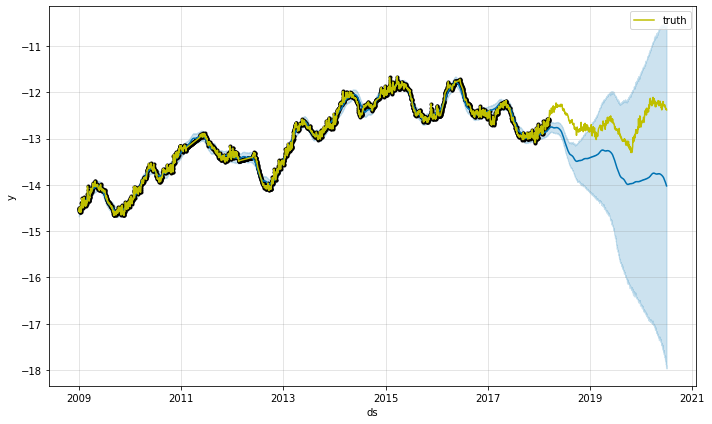

In [71]:
fig1 = m.plot(forecast)
plt.plot(auser_df["Date"],auser_df['Depth_to_Groundwater_LT2'],color="y",label="truth")
plt.legend()

Prophet model made predictions that are below the truth, but the confidence intervals cover majority of the ground truth. Prophet model accurately captures the seasonality of the time series

#### VAR for each individual depth column and independent features
Statistical tests and VAR code according to https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/. 
For simplicity, we only consider 'Depth_to_Groundwater_LT2' along with other rainfall, temperature and hydrometry columns.

In [72]:
auser_var_df_lt2_train = auser_train[['Rainfall_Gallicano', 'Rainfall_Pontetetto',
       'Rainfall_Monte_Serra', 'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano',
       'Rainfall_Piaggione', 'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli','Rainfall_Fabbriche_di_Vallico', 'Depth_to_Groundwater_LT2','Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico',
       'Hydrometry_Monte_S_Quirico']]
auser_var_df_lt2_test = auser_test[['Rainfall_Gallicano', 'Rainfall_Pontetetto',
       'Rainfall_Monte_Serra', 'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano',
       'Rainfall_Piaggione', 'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli','Rainfall_Fabbriche_di_Vallico', 'Depth_to_Groundwater_LT2','Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico',
       'Hydrometry_Monte_S_Quirico']]

In [73]:
#Granger causality
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df


In [74]:
grangers_causation_matrix(auser_var_df_lt2_train,['Rainfall_Gallicano', 'Rainfall_Pontetetto',
       'Rainfall_Monte_Serra', 'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano',
       'Rainfall_Piaggione', 'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli','Rainfall_Fabbriche_di_Vallico', 'Depth_to_Groundwater_LT2','Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico',
       'Hydrometry_Monte_S_Quirico'] )

Rainfall_Gallicano_x  \
Rainfall_Gallicano_y                                     1.0000   
Rainfall_Pontetetto_y                                    0.0000   
Rainfall_Monte_Serra_y                                   0.0001   
Rainfall_Orentano_y                                      0.0000   
Rainfall_Borgo_a_Mozzano_y                               0.0388   
Rainfall_Piaggione_y                                     0.0092   
Rainfall_Calavorno_y                                     0.0930   
Rainfall_Croce_Arcana_y                                  0.0000   
Rainfall_Tereglio_Coreglia_Antelminelli_y                0.0045   
Rainfall_Fabbriche_di_Vallico_y                          0.3088   
Depth_to_Groundwater_LT2_y                               0.0000   
Temperature_Orentano_y                                   0.0000   
Temperature_Monte_Serra_y                                0.0002   
Temperature_Ponte_a_Moriano_y                            0.0000   
Temperature_Lucca_Orto_Botanico_y                        0.0000   
Hydrometry_Monte_S_Quirico_y                             0.0000   

                                           Rainfall_Pontetetto_x  \
Rainfall_Gallicano_y                                      0.0000   
Rainfall_Pontetetto_y                                     1.0000   
Rainfall_Monte_Serra_y                                    0.0047   
Rainfall_Orentano_y                                       0.0038   
Rainfall_Borgo_a_Mozzano_y                                0.1984   
Rainfall_Piaggione_y                                      0.0443   
Rainfall_Calavorno_y                                      0.0001   
Rainfall_Croce_Arcana_y                                   0.0000   
Rainfall_Tereglio_Coreglia_Antelminelli_y                 0.0154   
Rainfall_Fabbriche_di_Vallico_y                           0.0003   
Depth_to_Groundwater_LT2_y                                0.0000   
Temperature_Orentano_y                                    0.0000   
Temperature_Monte_Serra_y                                 0.0371   
Temperature_Ponte_a_Moriano_y                             0.0065   
Temperature_Lucca_Orto_Botanico_y                         0.0004   
Hydrometry_Monte_S_Quirico_y                              0.0000   

                                           Rainfall_Monte_Serra_x  \
Rainfall_Gallicano_y                                       0.0000   
Rainfall_Pontetetto_y                                      0.0000   
Rainfall_Monte_Serra_y                                     1.0000   
Rainfall_Orentano_y                                        0.0000   
Rainfall_Borgo_a_Mozzano_y                                 0.0000   
Rainfall_Piaggione_y                                       0.0000   
Rainfall_Calavorno_y                                       0.0000   
Rainfall_Croce_Arcana_y                                    0.0000   
Rainfall_Tereglio_Coreglia_Antelminelli_y                  0.0027   
Rainfall_Fabbriche_di_Vallico_y                            0.0000   
Depth_to_Groundwater_LT2_y                                 0.0000   
Temperature_Orentano_y                                     0.0000   
Temperature_Monte_Serra_y                                  0.0114   
Temperature_Ponte_a_Moriano_y                              0.0001   
Temperature_Lucca_Orto_Botanico_y                          0.0020   
Hydrometry_Monte_S_Quirico_y                               0.0000   

                                           Rainfall_Orentano_x  \
Rainfall_Gallicano_y                                    0.0000   
Rainfall_Pontetetto_y                                   0.0000   
Rainfall_Monte_Serra_y                                  0.0000   
Rainfall_Orentano_y                                     1.0000   
Rainfall_Borgo_a_Mozzano_y                              0.0000   
Rainfall_Piaggione_y                                    0.0014   
Rainfall_Calavorno_y                                    0.0000   
Rainfall_Croce_Arcana_y                     

Strong causality shown in the above dataframe in the row Depth_to_Groundwater_LT2_y.

In [75]:
for name, column in auser_var_df_lt2_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')
#only depth column is non-stationary

    Augmented Dickey-Fuller Test on "Rainfall_Gallicano" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -11.401
 No. Lags Chosen       = 14
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Rainfall_Pontetetto" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -11.9125
 No. Lags Chosen       = 13
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Rainfall_Monte_Serra" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root

In [76]:
df_differenced = auser_var_df_lt2_train.diff().dropna()

In [77]:
model = VAR(df_differenced)
for i in np.arange(17,22):
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Lag Order = 17
AIC :  25.65247607535203
BIC :  33.6439094474617
FPE :  139079808093.61942
HQIC:  28.511231390118475 

Lag Order = 18
AIC :  25.682663005387496
BIC :  34.144576697532855
FPE :  143499593610.9938
HQIC:  28.709768135713816 

Lag Order = 19
AIC :  25.579313452053423
BIC :  34.51194318245379
FPE :  129568666217.18425
HQIC:  28.774857862444907 

Lag Order = 20
AIC :  25.538948103909828
BIC :  34.942529781882456
FPE :  124612969414.51224
HQIC:  28.903021333523704 

Lag Order = 21
AIC :  25.54438764818936
BIC :  35.41915737436187
FPE :  125482438739.86703
HQIC:  29.077079310919373 



Lag 20 has the smallest AIC

In [78]:
model_fitted = model.fit(20)
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)
#uncorrelated residuals
for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))

Date : 1.99
Rainfall_Settefrati : 2.0
Temperature_Settefrati : 2.0
Flow_Rate_Madonna_di_Canneto : 2.0
year : 2.0
month : 2.0
day_in_year : 2.0
week_in_year : 2.01


In [79]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=auser_var_df_lt2_test.shape[0])
df_forecast = pd.DataFrame(fc, index=auser_var_df_lt2_test.index, columns=auser_var_df_lt2_test.columns + '_1d')
df_forecast

20


Rainfall_Gallicano_1d  Rainfall_Pontetetto_1d  \
Date                                                        
2018-03-15              46.041792               15.779788   
2018-03-16             -29.165861                0.293540   
2018-03-17             -20.284015              -16.213630   
2018-03-18               4.248453                7.670127   
2018-03-19               4.390761               -1.018069   
...                           ...                     ...   
2020-06-26               0.001486                0.000965   
2020-06-27               0.001486                0.000965   
2020-06-28               0.001486                0.000965   
2020-06-29               0.001486                0.000965   
2020-06-30               0.001486                0.000965   

            Rainfall_Monte_Serra_1d  Rainfall_Orentano_1d  \
Date                                                        
2018-03-15                12.603405             18.009041   
2018-03-16                 2.360327              2.507406   
2018-03-17               -11.337889            -17.438349   
2018-03-18                 5.058684              3.611014   
2018-03-19                -4.972589             -0.601600   
...                             ...                   ...   
2020-06-26                 0.001078              0.001508   
2020-06-27                 0.001078              0.001508   
2020-06-28                 0.001078              0.001508   
2020-06-29                 0.001078              0.001508   
2020-06-30                 0.001078              0.001508   

            Rainfall_Borgo_a_Mozzano_1d  Rainfall_Piaggione_1d  \
Date                                                             
2018-03-15                    28.768595               7.661238   
2018-03-16                   -18.904802              -8.483306   
2018-03-17                   -19.943967             -21.427947   
2018-03-18                     8.056958               8.622274   
2018-03-19                     2.211118              -1.336279   
...                                 ...                    ...   
2020-06-26                    -0.000963               0.005730   
2020-06-27                    -0.000963               0.005730   
2020-06-28                    -0.000963               0.005730   
2020-06-29                    -0.000963               0.005730   
2020-06-30                    -0.000963               0.005730   

            Rainfall_Calavorno_1d  Rainfall_Croce_Arcana_1d  \
Date                                                          
2018-03-15              37.068495                 22.094265   
2018-03-16             -23.069233                 -5.766825   
2018-03-17             -18.774182                 -1.729476   
2018-03-18               7.954736                 -6.609726   
2018-03-19              -1.211879                  0.457792   
...                           ...                       ...   
2020-06-26               0.000840                  0.002568   
2020-06-27               0.000840                  0.002568   
2020-06-28               0.000840                  0.002568   
2020-06-29               0.000840                  0.002568   
2020-06-30               0.000840                  0.002568   

            Rainfall_Tereglio_Coreglia_Antelminelli_1d  \
Date                                                     
2018-03-15                                  -34.126487   
2018-03-16                                  -19.598189   
2018-03-17                                   -1.407359   
2018-03-18                                    9.654099   
2018-03-19                                   -7.770390   
...                                                ...   
2020-06-26                                    0.001120   
2020-06-27                                    0.001120   
2020-06-28                                    0.001120   
2020-06-29                                    0.001120   
2020-06-30                                    0.0

In [80]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [81]:
df_results = invert_transformation(auser_var_df_lt2_train, df_forecast)        
df_results.head()

Rainfall_Gallicano_1d  Rainfall_Pontetetto_1d  \
Date                                                        
2018-03-15              46.041792               15.779788   
2018-03-16             -29.165861                0.293540   
2018-03-17             -20.284015              -16.213630   
2018-03-18               4.248453                7.670127   
2018-03-19               4.390761               -1.018069   

            Rainfall_Monte_Serra_1d  Rainfall_Orentano_1d  \
Date                                                        
2018-03-15                12.603405             18.009041   
2018-03-16                 2.360327              2.507406   
2018-03-17               -11.337889            -17.438349   
2018-03-18                 5.058684              3.611014   
2018-03-19                -4.972589             -0.601600   

            Rainfall_Borgo_a_Mozzano_1d  Rainfall_Piaggione_1d  \
Date                                                             
2018-03-15                    28.768595               7.661238   
2018-03-16                   -18.904802              -8.483306   
2018-03-17                   -19.943967             -21.427947   
2018-03-18                     8.056958               8.622274   
2018-03-19                     2.211118              -1.336279   

            Rainfall_Calavorno_1d  Rainfall_Croce_Arcana_1d  \
Date                                                          
2018-03-15              37.068495                 22.094265   
2018-03-16             -23.069233                 -5.766825   
2018-03-17             -18.774182                 -1.729476   
2018-03-18               7.954736                 -6.609726   
2018-03-19              -1.211879                  0.457792   

            Rainfall_Tereglio_Coreglia_Antelminelli_1d  \
Date                                                     
2018-03-15                                  -34.126487   
2018-03-16                                  -19.598189   
2018-03-17                                   -1.407359   
2018-03-18                                    9.654099   
2018-03-19                                   -7.770390   

            Rainfall_Fabbriche_di_Vallico_1d  ...  \
Date                                          ...   
2018-03-15                         42.344156  ...   
2018-03-16                        -31.580729  ...   
2018-03-17                        -16.904616  ...   
2018-03-18                          1.770423  ...   
2018-03-19                          3.009083  ...   

            Rainfall_Calavorno_forecast  Rainfall_Croce_Arcana_forecast  \
Date                                                                      
2018-03-15                    45.268495                       25.094265   
2018-03-16                    22.199263                       19.327439   
2018-03-17                     3.425081                       17.597963   
2018-03-18                    11.379816                       10.988237   
2018-03-19                    10.167937                       11.446029   

            Rainfall_Tereglio_Coreglia_Antelminelli_forecast  \
Date                                                           
2018-03-15                                         27.073513   
2018-03-16                                          7.475324   
2018-03-17                                          6.067965   
2018-03-18                                         15.722064   
2018-03-19                                          7.951674   

            Rainfall_Fabbriche_di_Vallico_forecast  \
Date                                                 
2018-03-15                               55.144156   
2018-03-16                               23.563426   
2018-03-17                                6.658811   
2018-03-18                                8.429234   
2018-03-19                               11.438317   

            Depth_to_Groundwater_LT2_forecast  Temperature_Orentano_forecast  \
Date                                  

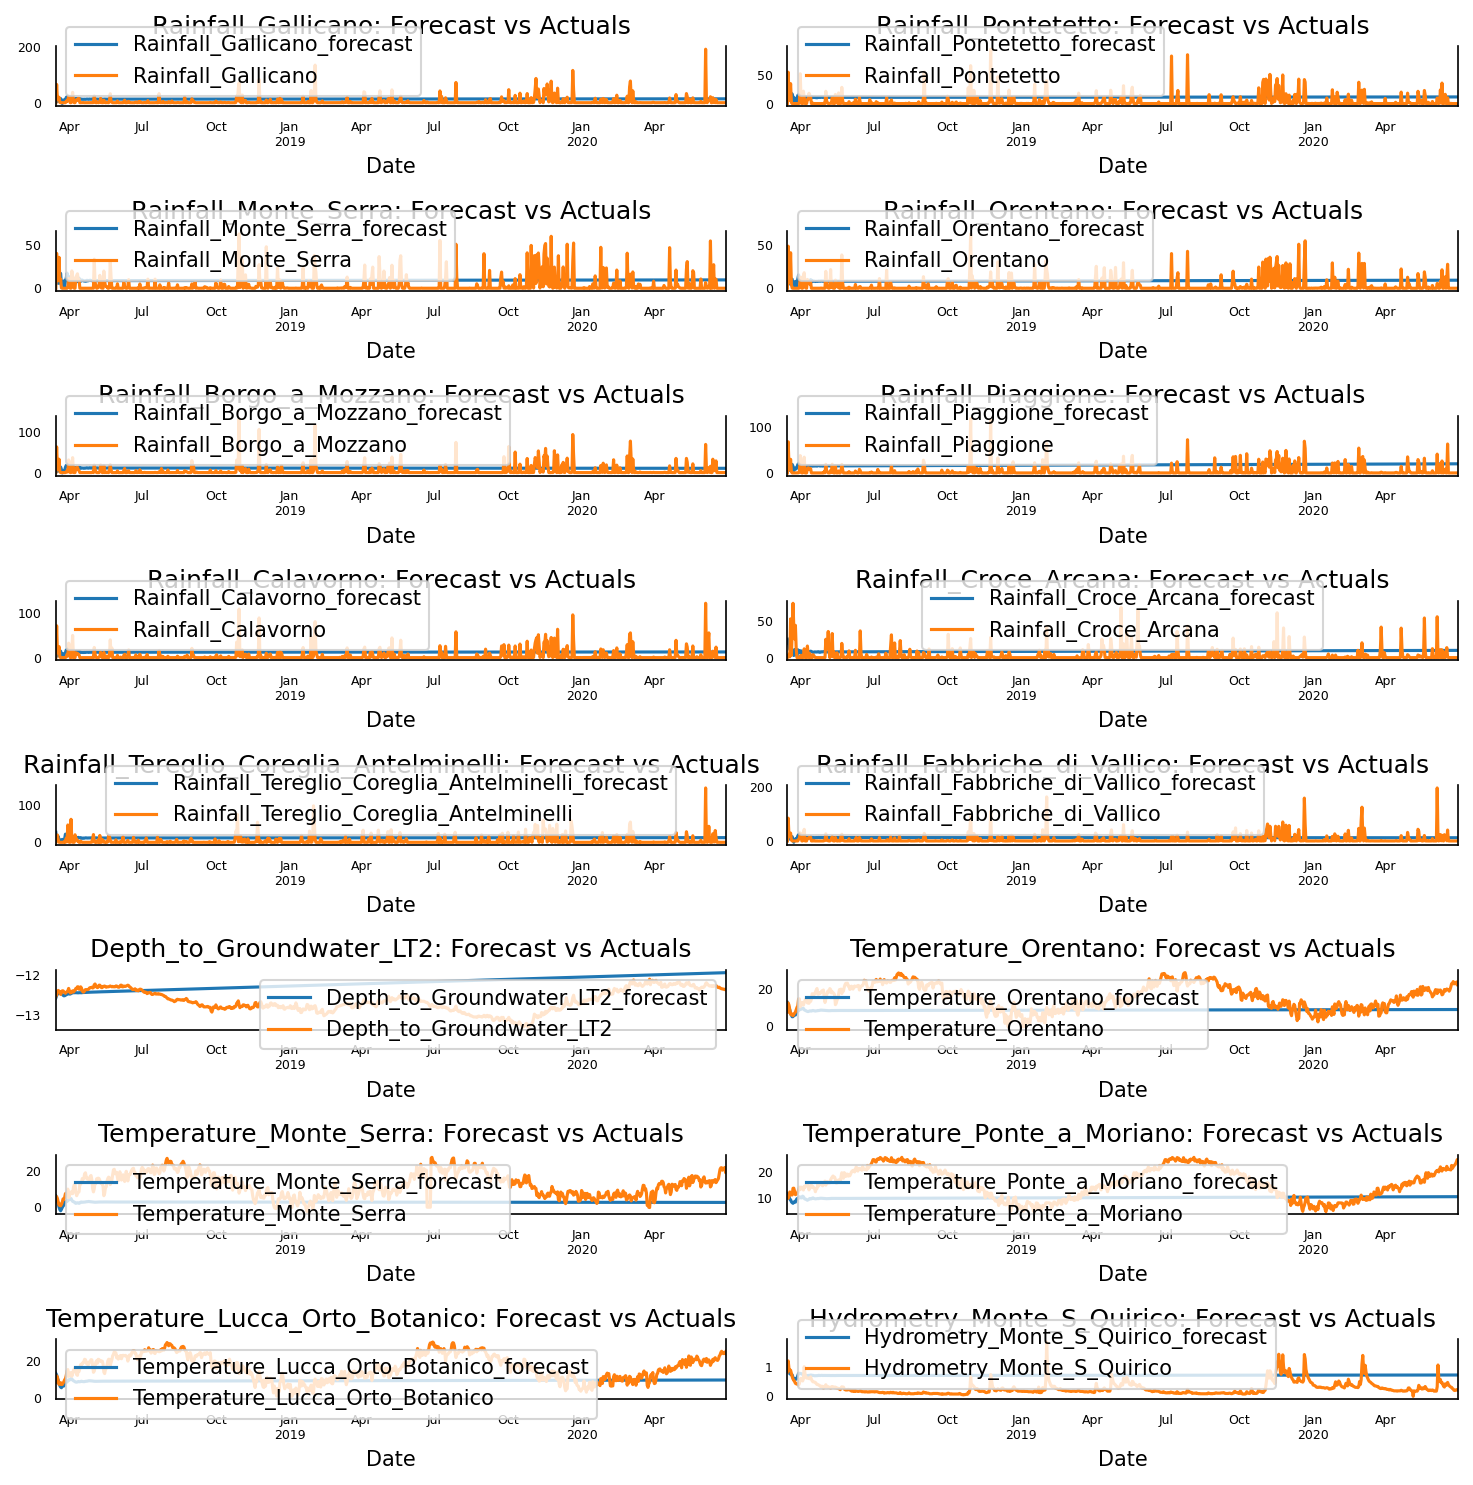

In [82]:
#plot forecast and actual
fig, axes = plt.subplots(nrows=int(len(auser_var_df_lt2_train.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(auser_var_df_lt2_train.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    auser_var_df_lt2_test[col].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

Looking at the plot for Depth_Gound_Water_LT2, VAR also not quite captured the seasonality but its predictions might have smalled errors than Prophet.

#### Doganella

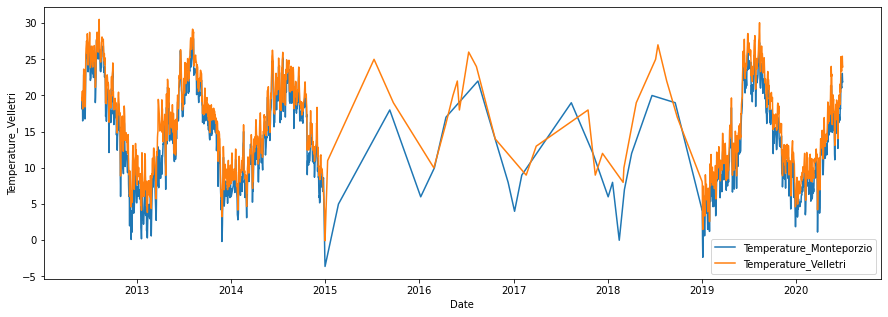

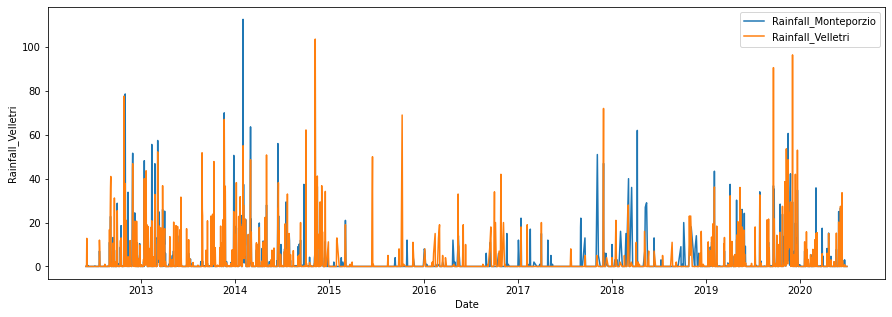

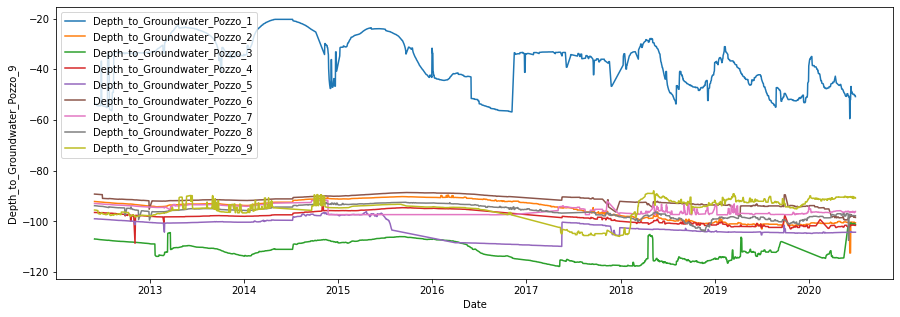

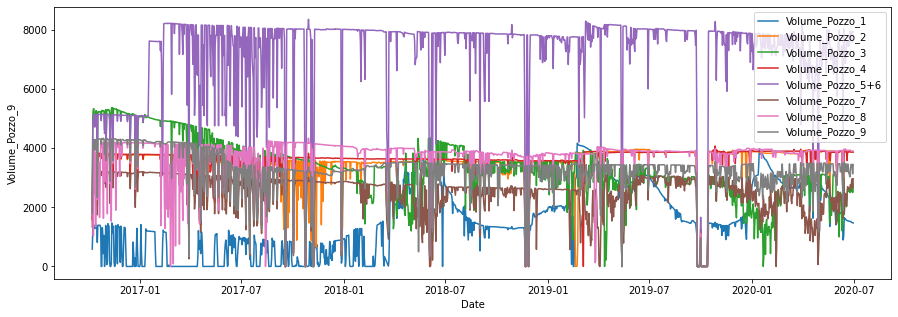

In [83]:
group_plots(doganella_df)

There are a lot of missing values for temperature from 2015 to 2019, need to impute those missing values.


In [84]:
#interpolate depth
dog_depth = [x for x in doganella_df.columns if re.search("Depth",x)]
doganella_df.loc[:,dog_depth] = doganella_df.loc[:,dog_depth].interpolate()

In [85]:
doganella_df_by_day = doganella_df.groupby("day_in_year").median().reset_index()
impute_nan(doganella_df,doganella_df_by_day,["Temperature_Velletri",'Temperature_Monteporzio'])

#### Luco

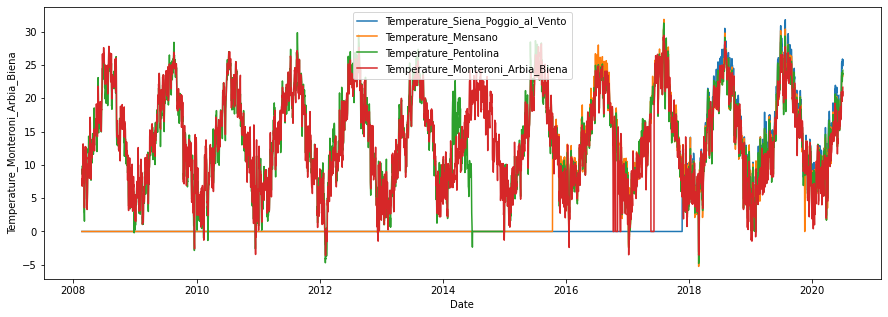

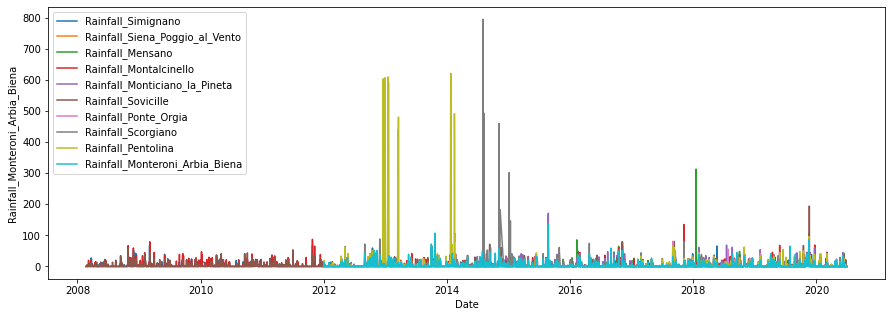

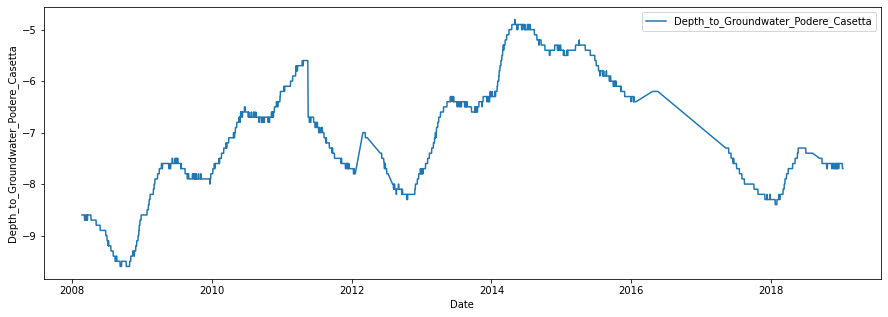

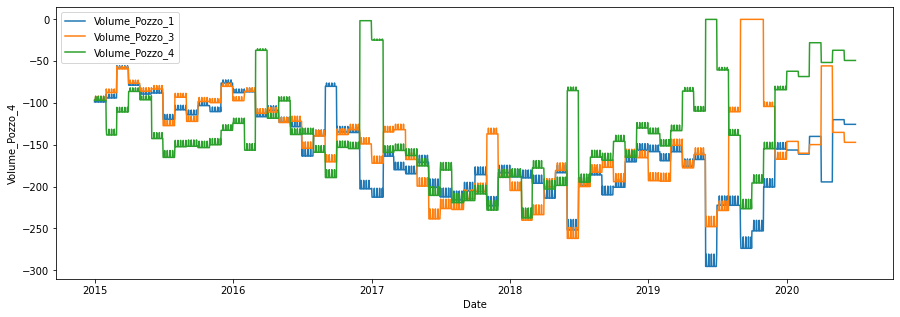

In [86]:
group_plots(luco_df)

In [87]:
replace_zeros_with_nan(luco_df,['Temperature_Siena_Poggio_al_Vento', 'Temperature_Mensano',
       'Temperature_Pentolina', 'Temperature_Monteroni_Arbia_Biena','Volume_Pozzo_1', 'Volume_Pozzo_3', 'Volume_Pozzo_4'])

There are a lot of abnormal zeros in temperature columns

In [88]:
#interpolate depth
luco_depth = [x for x in luco_df.columns if re.search("Depth",x)]
luco_df.loc[:,luco_depth] = luco_df.loc[:,luco_depth].interpolate()

In [89]:
luco_by_day = luco_df.groupby("day_in_year").median().reset_index()

In [90]:
impute_nan(luco_df,luco_by_day,list(luco_df.columns[1:19]))

In [91]:
#still zeroes in volume
#need to interpolate depth

#### Petrignano

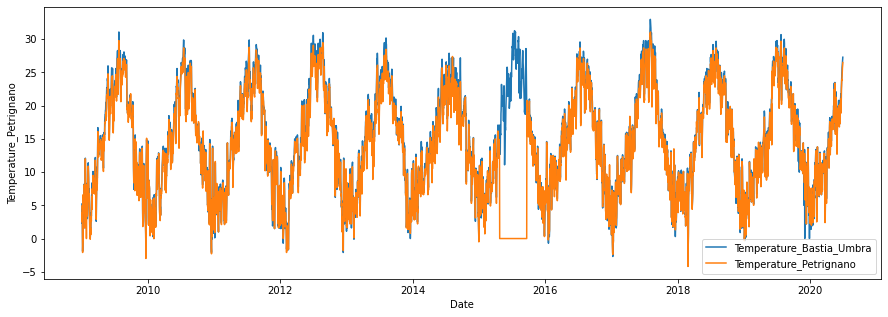

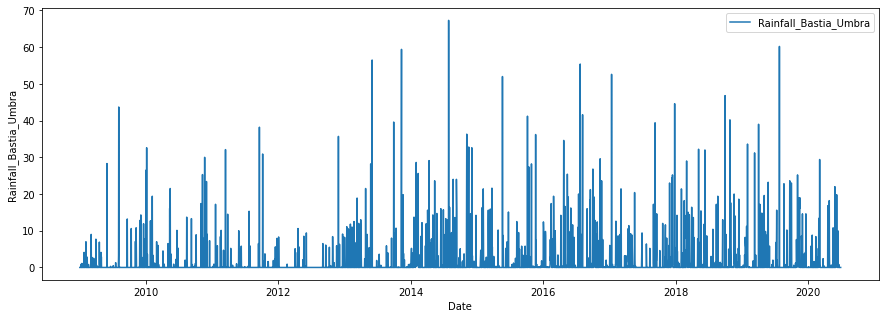

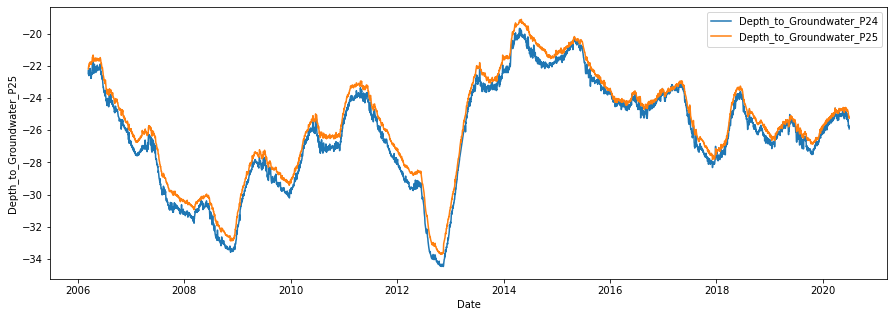

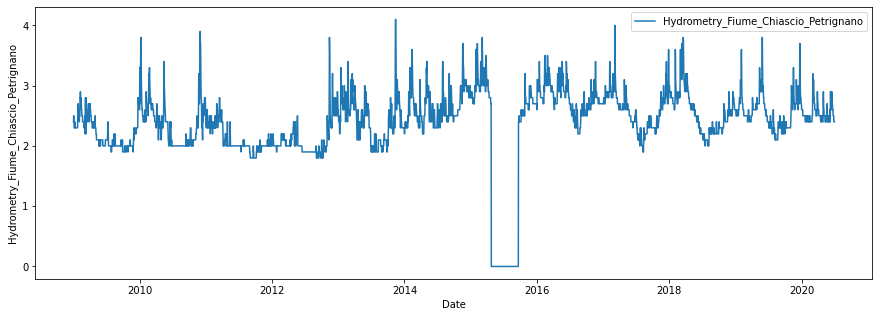

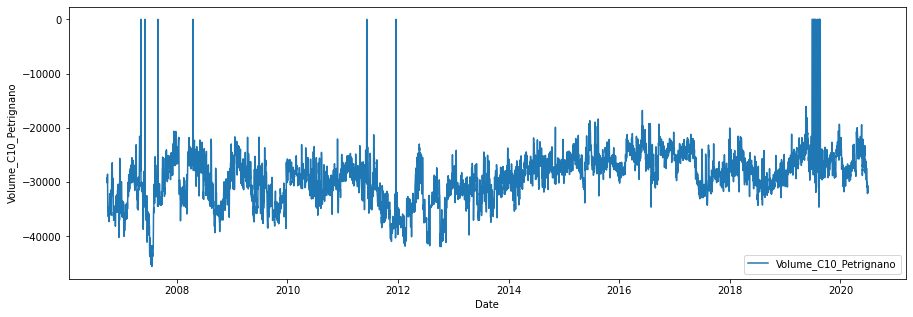

In [92]:
group_plots(aqui_petrignano)

There are many missing values and abnormal zeros for temperature in Petrignano, hydrometry and volume

In [93]:
petrignano_by_day = aqui_petrignano.groupby("day_in_year").median().reset_index()

In [94]:
replace_zeros_with_nan(aqui_petrignano,['Temperature_Petrignano','Volume_C10_Petrignano','Hydrometry_Fiume_Chiascio_Petrignano'])

In [95]:
aqui_petrignano['Volume_C10_Petrignano'][aqui_petrignano['Volume_C10_Petrignano']==0] = np.nan

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
impute_cols = aqui_petrignano.columns[1:-4][(aqui_petrignano.columns[1:-4]!="Depth_to_Groundwater_P24")&
                                           (aqui_petrignano.columns[1:-4]!="Depth_to_Groundwater_P25")]

In [97]:
impute_cols

Index(['Rainfall_Bastia_Umbra', 'Temperature_Bastia_Umbra',
       'Temperature_Petrignano', 'Volume_C10_Petrignano',
       'Hydrometry_Fiume_Chiascio_Petrignano'],
      dtype='object')

In [98]:
impute_nan(aqui_petrignano,petrignano_by_day,impute_cols)

In [99]:
aqui_petrignano.columns[1:-4]

Index(['Rainfall_Bastia_Umbra', 'Depth_to_Groundwater_P24',
       'Depth_to_Groundwater_P25', 'Temperature_Bastia_Umbra',
       'Temperature_Petrignano', 'Volume_C10_Petrignano',
       'Hydrometry_Fiume_Chiascio_Petrignano'],
      dtype='object')

In [100]:
#to do: cannot impute depths with median value, use interpolating
aqui_petrignano.loc[:,'Depth_to_Groundwater_P24'] = aqui_petrignano['Depth_to_Groundwater_P24'].interpolate()
aqui_petrignano.loc[:,'Depth_to_Groundwater_P25'] = aqui_petrignano['Depth_to_Groundwater_P25'].interpolate()

### Lake

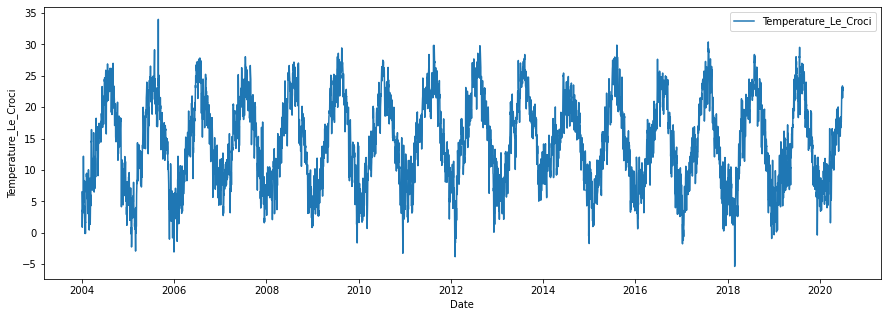

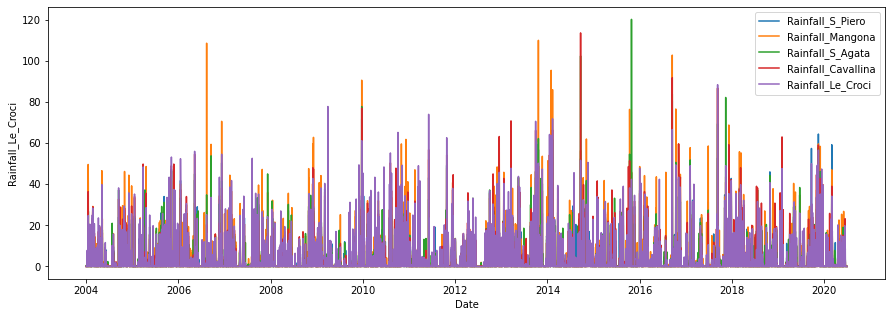

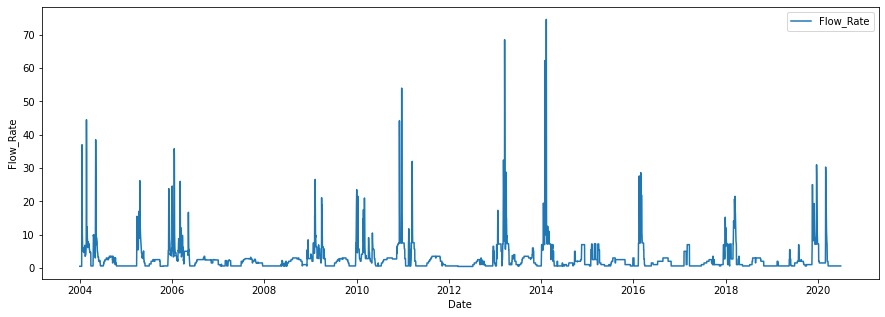

In [101]:
group_plots(bilancino)

In [102]:
bilan_by_day = bilancino.groupby("day_in_year").median().reset_index()
impute_nan(bilancino,bilan_by_day,bilancino.columns[1:-4])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


### River

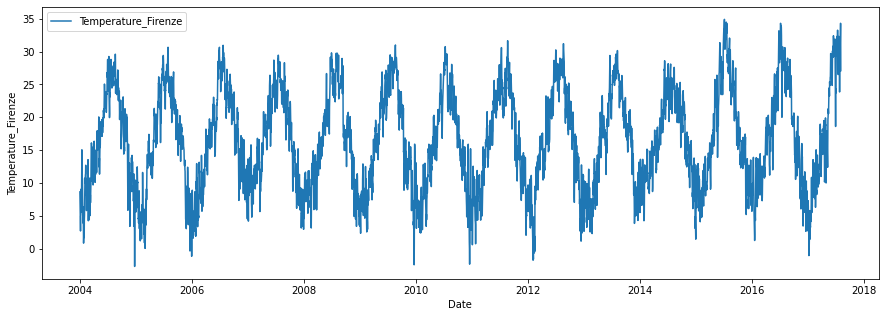

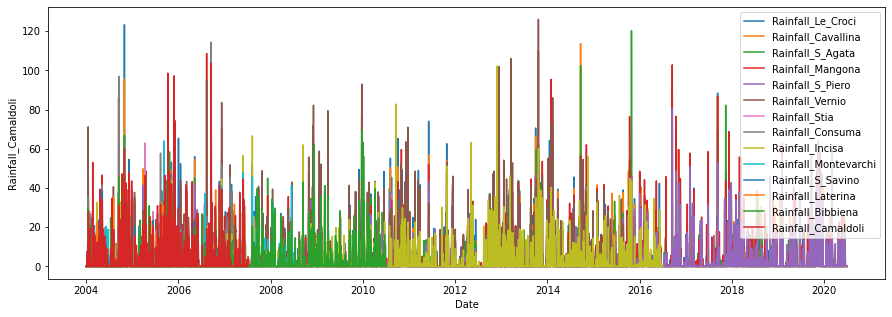

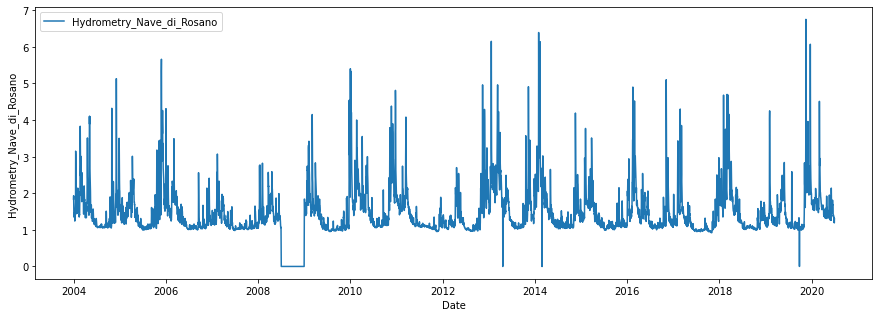

In [103]:
group_plots(arno)

In [104]:
arno.columns
arno_by_day = arno.groupby("day_in_year").median().reset_index()
replace_zeros_with_nan(arno,['Hydrometry_Nave_di_Rosano'])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [105]:
#todo still zeros in hydrometry
arno.loc[:,'Hydrometry_Nave_di_Rosano'][arno['Hydrometry_Nave_di_Rosano']==0] = np.nan
arno['Hydrometry_Nave_di_Rosano'][arno['Hydrometry_Nave_di_Rosano'].isna()]
impute_nan(arno,arno_by_day,arno.columns[1:-4])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

### Water Spring

#### Amiata

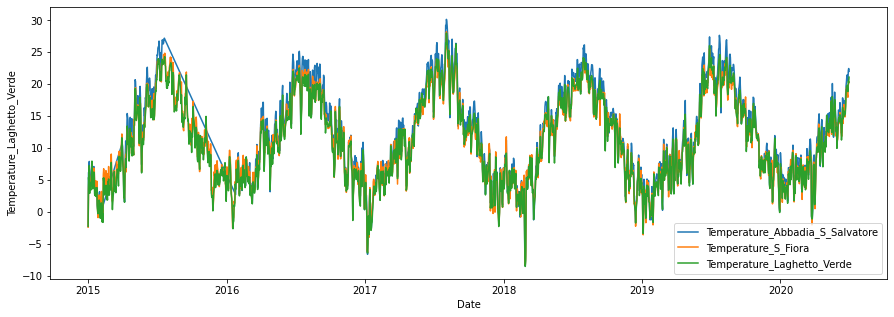

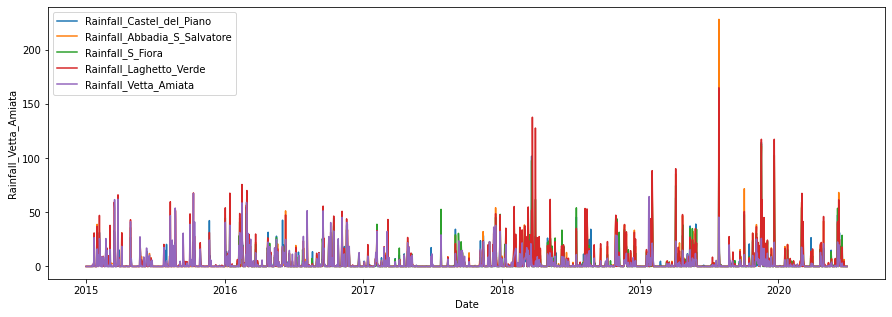

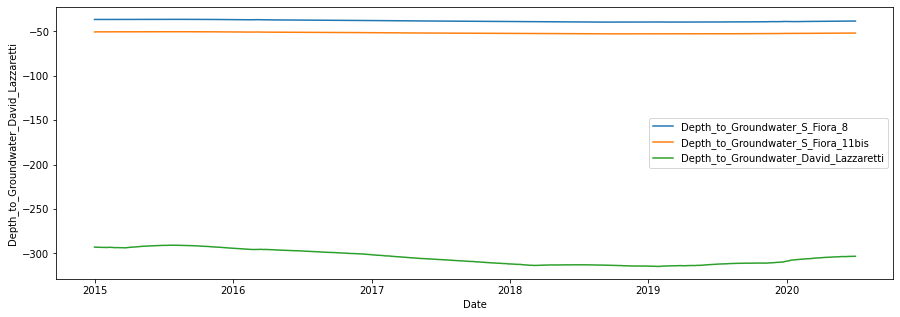

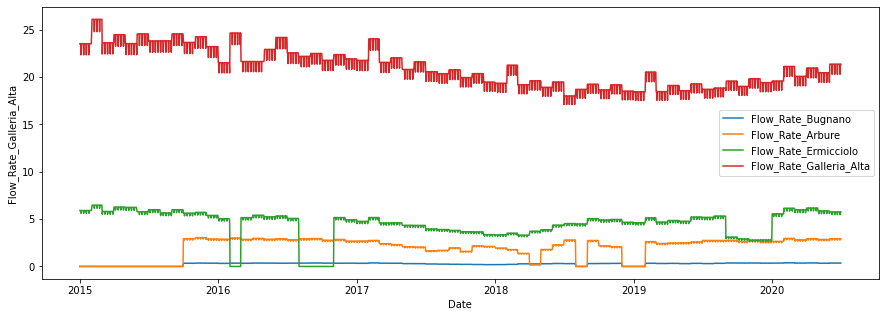

In [106]:
group_plots(ws_amiata_df)

<AxesSubplot:>

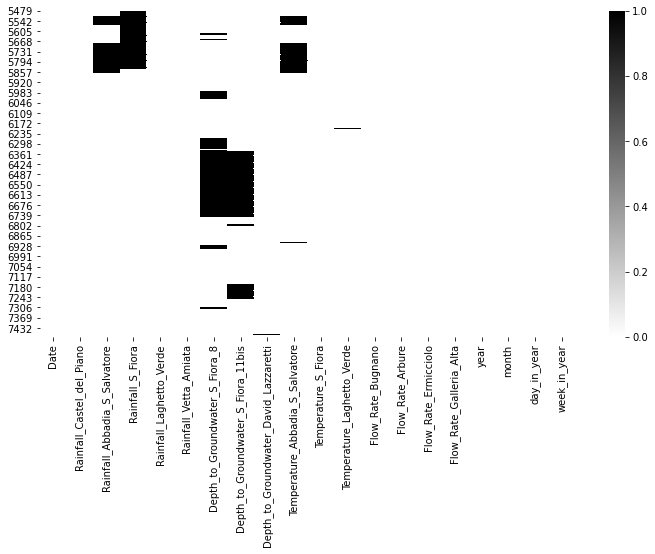

In [107]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))

sns.heatmap(ws_amiata_df.isna().astype(int),  
            cmap='binary', linewidth=0, vmin=0, vmax=1)

In [108]:
#todo replace flow rate zeros with nan
amiata_flrt_cols = [c for c in ws_amiata_df.columns if re.search("Flow",c)]
replace_zeros_with_nan(ws_amiata_df,amiata_flrt_cols)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [109]:
amiata_by_day = ws_amiata_df.groupby("day_in_year").median().reset_index()

In [110]:
impute_nan(ws_amiata_df,amiata_by_day ,ws_amiata_df.columns[1:-4])

#### Lupa

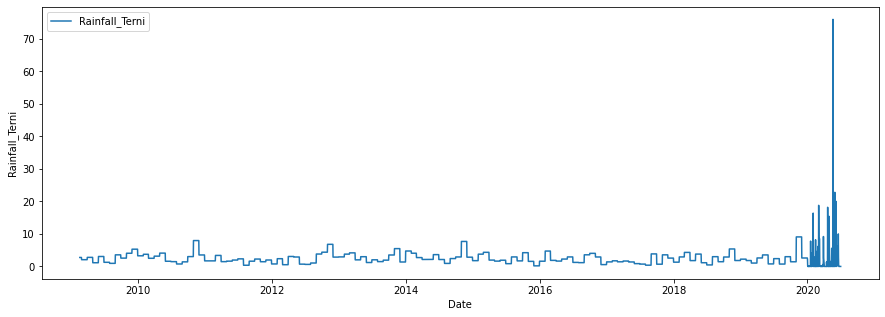

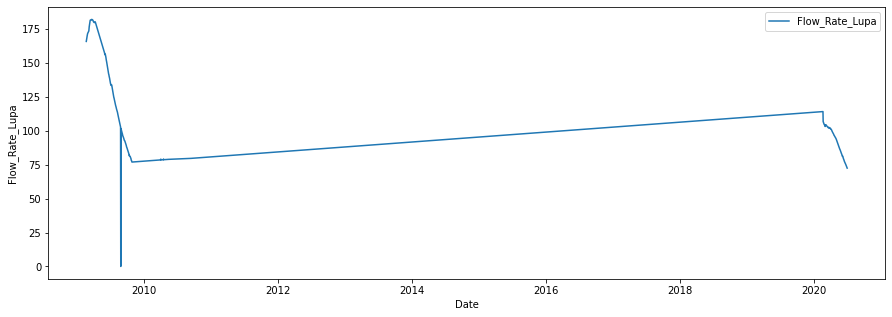

In [111]:
group_plots(ws_lupa_df)

In [112]:
#to do replace flow rate zeroes
#ws_lupa_df["Flow_Rate_Lupa"][ws_lupa_df["Flow_Rate_Lupa"]==0]
ws_lupa_df.loc[:,"Flow_Rate_Lupa"][ws_lupa_df["Flow_Rate_Lupa"]==0] =np.nan

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [113]:
ws_lupa_df.loc[:,"Flow_Rate_Lupa"][237]

nan

In [114]:
#after replace the only zero in flow rate with nan, impute the missing value by interpolating
ws_lupa_df.loc[:,"Flow_Rate_Lupa"]=ws_lupa_df["Flow_Rate_Lupa"].interpolate()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


#### Madonna_di_Canneto

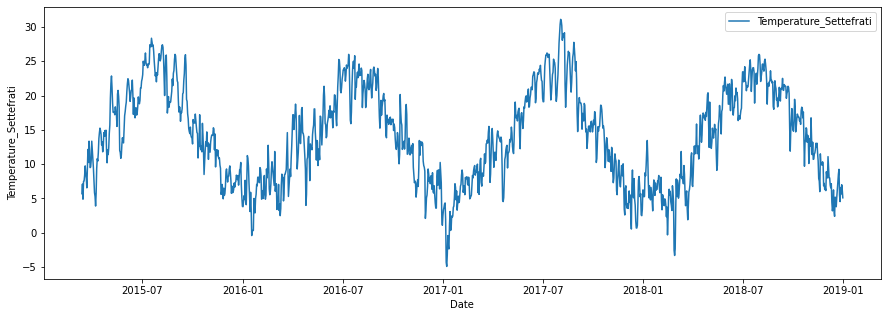

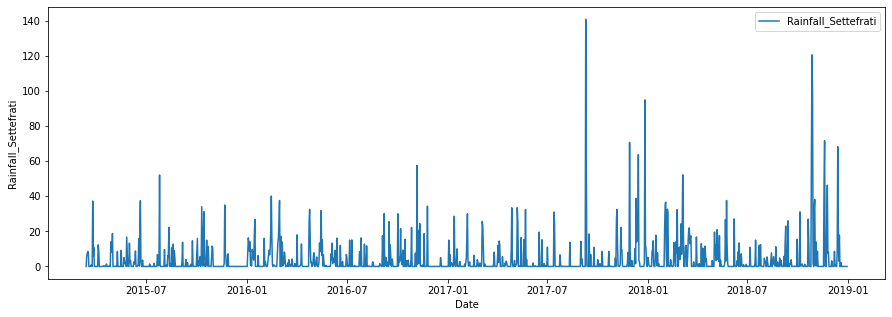

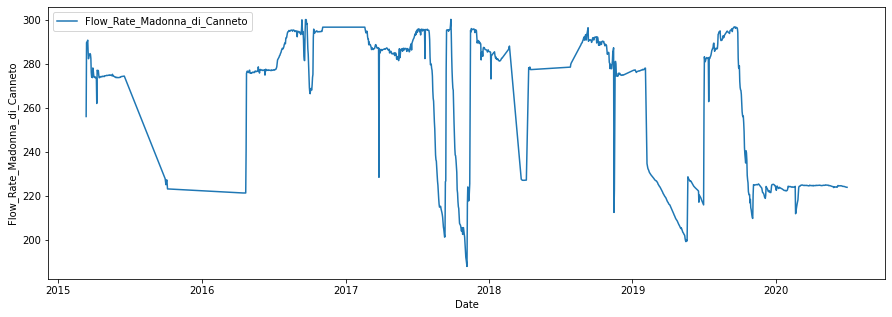

In [115]:
group_plots(ws_mc_df)

<AxesSubplot:>

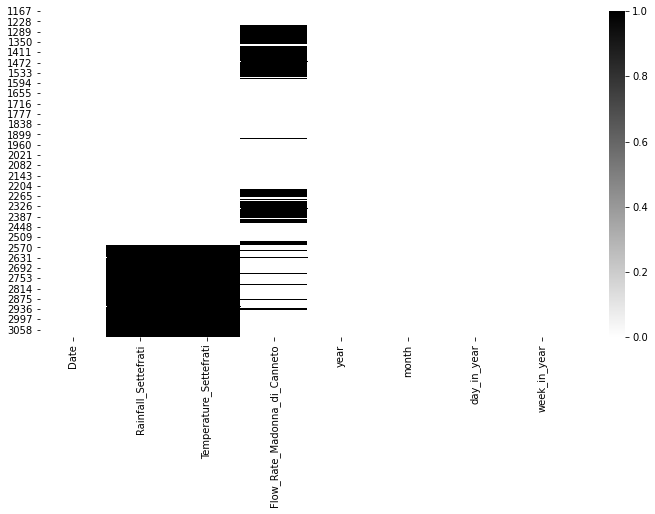

In [116]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))

sns.heatmap(ws_mc_df.isna().astype(int),  
            cmap='binary', linewidth=0, vmin=0, vmax=1)

In [117]:
mc_by_day = ws_mc_df.groupby("day_in_year").median().reset_index()
impute_nan(ws_mc_df,mc_by_day,ws_mc_df.columns[1:-4])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
